Hello Brandon!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure!

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>


The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

Goal:


In [ ]:
# !pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import zipfile

from pandas.api.types import is_numeric_dtype
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator, DayLocator, HourLocator
from sklearn.utils import shuffle
# from google.colab import drive

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# drive.mount('/content/drive')

In [ ]:
# zip_file_path = '/content/drive/MyDrive/Datasets/final_provider.zip'
# extraction_directory = '/content'

# os.makedirs(extraction_directory, exist_ok=True)

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extraction_directory)

# print("Extraction complete.")

# Load Data

In [ ]:
path = r'/datasets/final_provider/'
# path = r'/content/final_provider/'

In [ ]:
contract_df = pd.read_csv(os.path.join(path, 'contract.csv'))
contract_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
contract_df.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
contract_df.duplicated().sum()

0

In [ ]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
internet_df = pd.read_csv(os.path.join(path, 'internet.csv'))
internet_df.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
internet_df.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [ ]:
internet_df.duplicated().sum()

0

In [ ]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
personal_df = pd.read_csv(os.path.join(path, 'personal.csv'))
personal_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
personal_df.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [ ]:
personal_df.duplicated().sum()

0

In [ ]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
phone_df = pd.read_csv(os.path.join(path, 'phone.csv'))
phone_df.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
phone_df.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

In [ ]:
phone_df.duplicated().sum()

0

In [ ]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


# EDA

In [ ]:
# Join all of the 4 dataframes
all_df = personal_df.merge(contract_df, left_on=['customerID'], right_on=['customerID'], how='left')
all_df = all_df.merge(phone_df, left_on=['customerID'], right_on=['customerID'], how='left')
all_df = all_df.merge(internet_df, left_on=['customerID'], right_on=['customerID'], how='left')

In [ ]:
all_df.shape

(7043, 20)

In [ ]:
all_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


In [ ]:
all_df['BeginDate'] = pd.to_datetime(all_df['BeginDate'], format='%Y-%m-%d')

In [ ]:
all_df['EndDate'] = pd.to_datetime(all_df['EndDate'], errors='coerce')

In [ ]:
all_df['EndDate'] = pd.to_datetime(all_df['EndDate'], format='%Y-%m-%d', errors='coerce')

In [ ]:
all_df['TotalCharges'] = all_df['TotalCharges'].replace(" ", np.nan).astype(np.float32)

In [ ]:
# missing values
all_df['TotalCharges'].isnull().sum()

11

In [ ]:
# earliest beingdate
all_df['BeginDate'].min(), all_df['BeginDate'].max()

(Timestamp('2013-10-01 00:00:00'), Timestamp('2020-02-01 00:00:00'))

In [ ]:
# earliest enddate
all_df['EndDate'] .min(), all_df['EndDate'].max()

(Timestamp('2019-10-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

In [ ]:
# Churned percentage
100 * all_df[all_df['EndDate'].notnull()].shape[0] / all_df.shape[0]

26.536987079369588

In [ ]:
# create target
all_df['is_churned'] = all_df['EndDate'].apply(lambda x: 0 if pd.isna(x) else 1)

In [ ]:
all_df['is_churned'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: is_churned, dtype: float64

In [ ]:
all_df.groupby('is_churned')['MonthlyCharges'].mean()

is_churned
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64

In [ ]:
def remove_outliers(df, field):

    Q1 = df[field].sum(axis=1).quantile(0.25)
    Q3 = df[field].sum(axis=1).quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR

    return df[(df[field].sum(axis=1) > lb) &  (df[field].sum(axis=1) < ub)][field]

In [ ]:
def plot_hist(df, var, bins=30, title=None, xlabel=None, legends={}, r=1, c=1, by=None, remove_outlier = False, is_facet=False, col=None, row=None, figsize=(9, 7)):
    if by:
        axes = df[var].hist(by=df[by], figsize=figsize)
        if is_numeric_dtype(df[by]):
            for ax in axes:
                ax.set_title(legends[int(ax.get_title())])
    if is_facet:
        g = sns.FacetGrid(df, col=col, row=row)
        g.map(plt.hist, var)
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

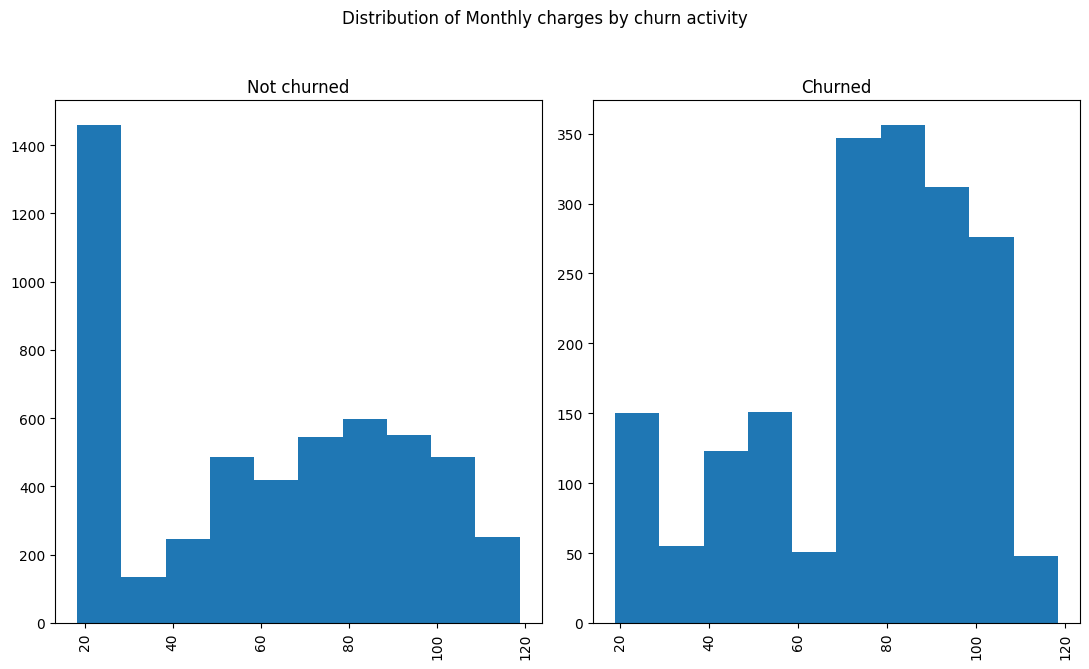

In [ ]:
var = 'MonthlyCharges'
plot_hist(
          all_df,
          var,
          bins=30,
          title='Distribution of Monthly charges by churn activity',
          xlabel=None,
          legends={0: 'Not churned', 1: 'Churned'},
          r=1,
          c=1,
          by='is_churned',
          figsize=(11, 7)
          )

In [ ]:
# proportion of high spending churned customers
all_df[(all_df['is_churned'] == 1) & (all_df['MonthlyCharges'] >= 70)].shape[0] / all_df[(all_df['is_churned'] == 1)].shape[0]

0.6816479400749064

68% of churned customers are in the high spending category - >= $70, which is worrisome.

Most of the customers in the "Not churned" category appear to be low spenders.

In [ ]:
all_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
all_df['gender'].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

In [ ]:
all_df.groupby('gender')['MonthlyCharges'].mean()

gender
Female    65.204243
Male      64.327482
Name: MonthlyCharges, dtype: float64

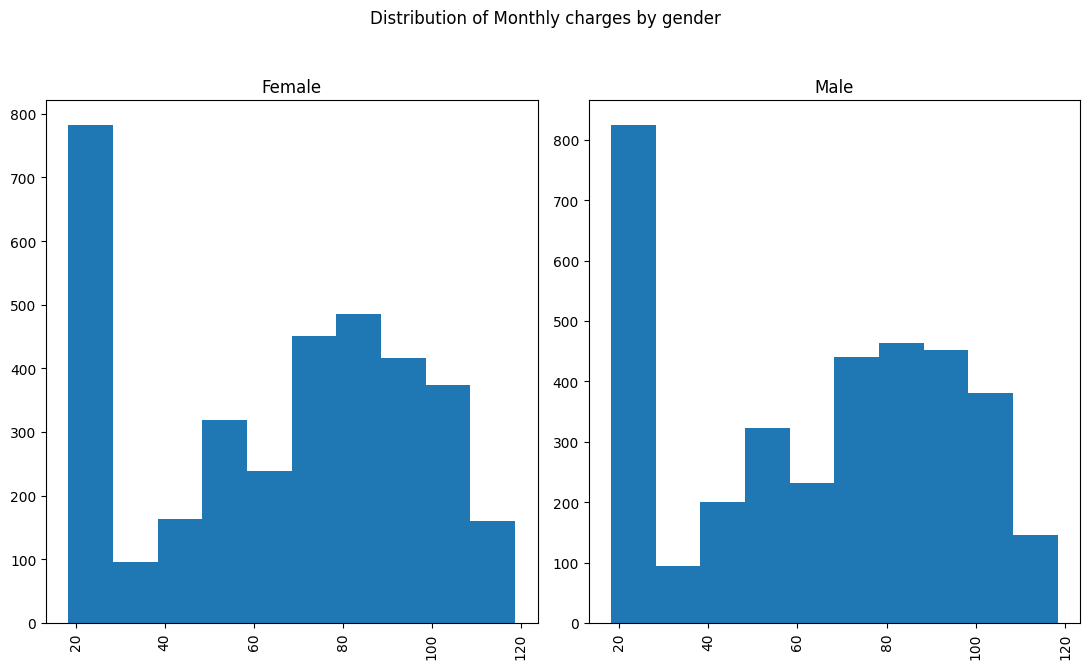

In [ ]:
plot_hist(
          all_df,
          var,
          bins=30,
          title='Distribution of Monthly charges by gender',
          xlabel=None,
          legends={0: 'Not churned', 1: 'Churned'},
          r=1,
          c=1,
          by='gender',
          figsize=(11, 7)
          )

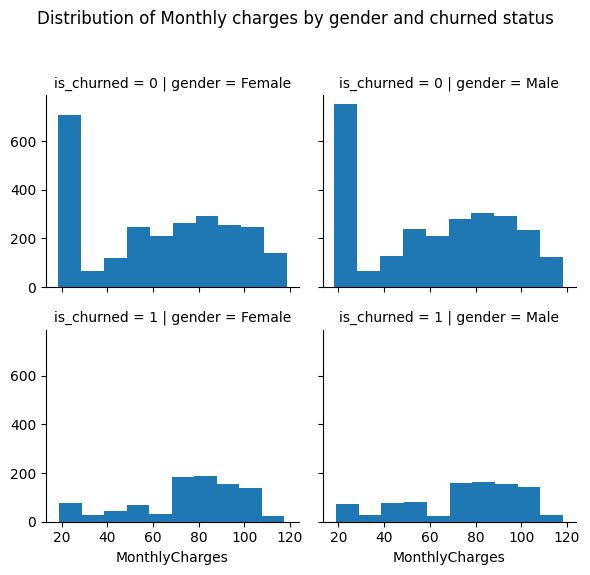

In [ ]:
plot_hist(
          all_df,
          var,
          bins=30,
          title='Distribution of Monthly charges by gender and churned status',
          xlabel=None,
          r=1,
          c=1,
          is_facet=True,
          col='gender',
          row='is_churned',
          figsize=(11, 7)
          )

In [ ]:
# proportion of high spending churned customers
all_df[(all_df['is_churned'] == 1) & (all_df['MonthlyCharges'] >= 70) & (all_df['gender'] == 'Female')].shape[0] /all_df[(all_df['is_churned'] == 1) & (all_df['gender'] == 'Female')].shape[0]

0.6964856230031949

In [ ]:
# proportion of senior citizen
all_df['SeniorCitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

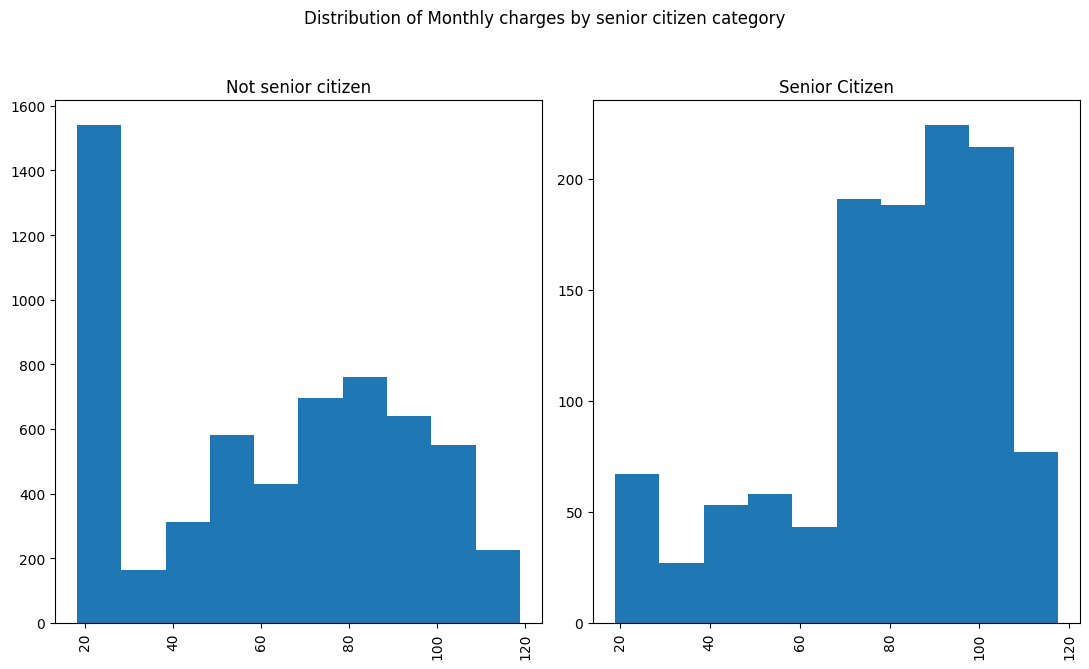

In [ ]:
plot_hist(
          all_df,
          var,
          bins=30,
          title='Distribution of Monthly charges by senior citizen category',
          xlabel=None,
          legends={0: 'Not senior citizen', 1: 'Senior Citizen'},
          r=1,
          c=1,
          by='SeniorCitizen',
          figsize=(11, 7))

In [ ]:
# number of senior citizens
all_df[(all_df['SeniorCitizen'] == 1)].shape[0]

1142

In [ ]:
# proportion of senior citizens who spend $70 or more
all_df[(all_df['SeniorCitizen'] == 1) & (all_df['MonthlyCharges'] >= 70)].shape[0] / all_df[(all_df['SeniorCitizen'] == 1)].shape[0]

0.7556917688266199

While the number of SeniorCitizen are small - 1142 in all, the distribution of MonthlyCharges by SeniorCitizen category shows that in the senior citizens category most of them (75%) are higher spenders, i.e having a monthly charge of $70 or greater.

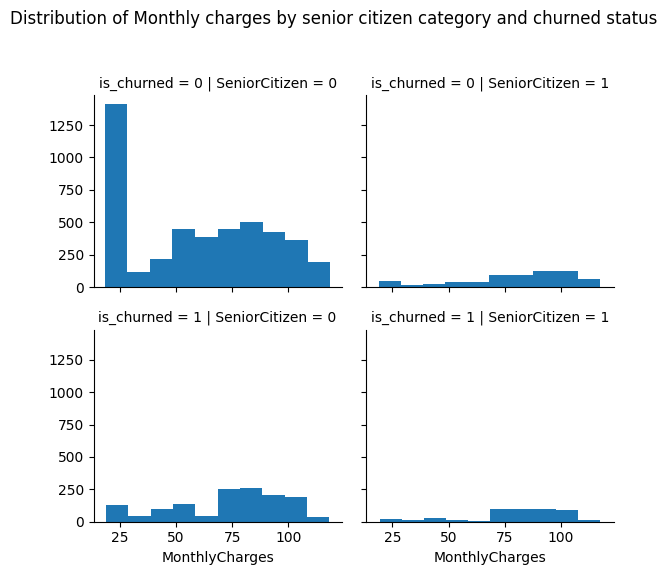

In [ ]:
plot_hist(
          all_df,
          var,
          bins=30,
          title='Distribution of Monthly charges by senior citizen category and churned status',
          xlabel=None,
          legends={0: 'Not senior citizen', 1: 'Senior Citizen'},
          r=1,
          c=1,
          is_facet=True,
          col='SeniorCitizen',
          row='is_churned',
          figsize=(11, 7))

In [ ]:
def bar_plot(df, field, stack, ax=None, aggfunc='size', title=None, axes=None):
    df.pivot_table(index=field, columns=stack, aggfunc=aggfunc).plot(kind='bar', stacked=False, title=title, ax=ax,  figsize=(15, 15))
    axes.flat[-1].set_visible(False)
    plt.tight_layout()

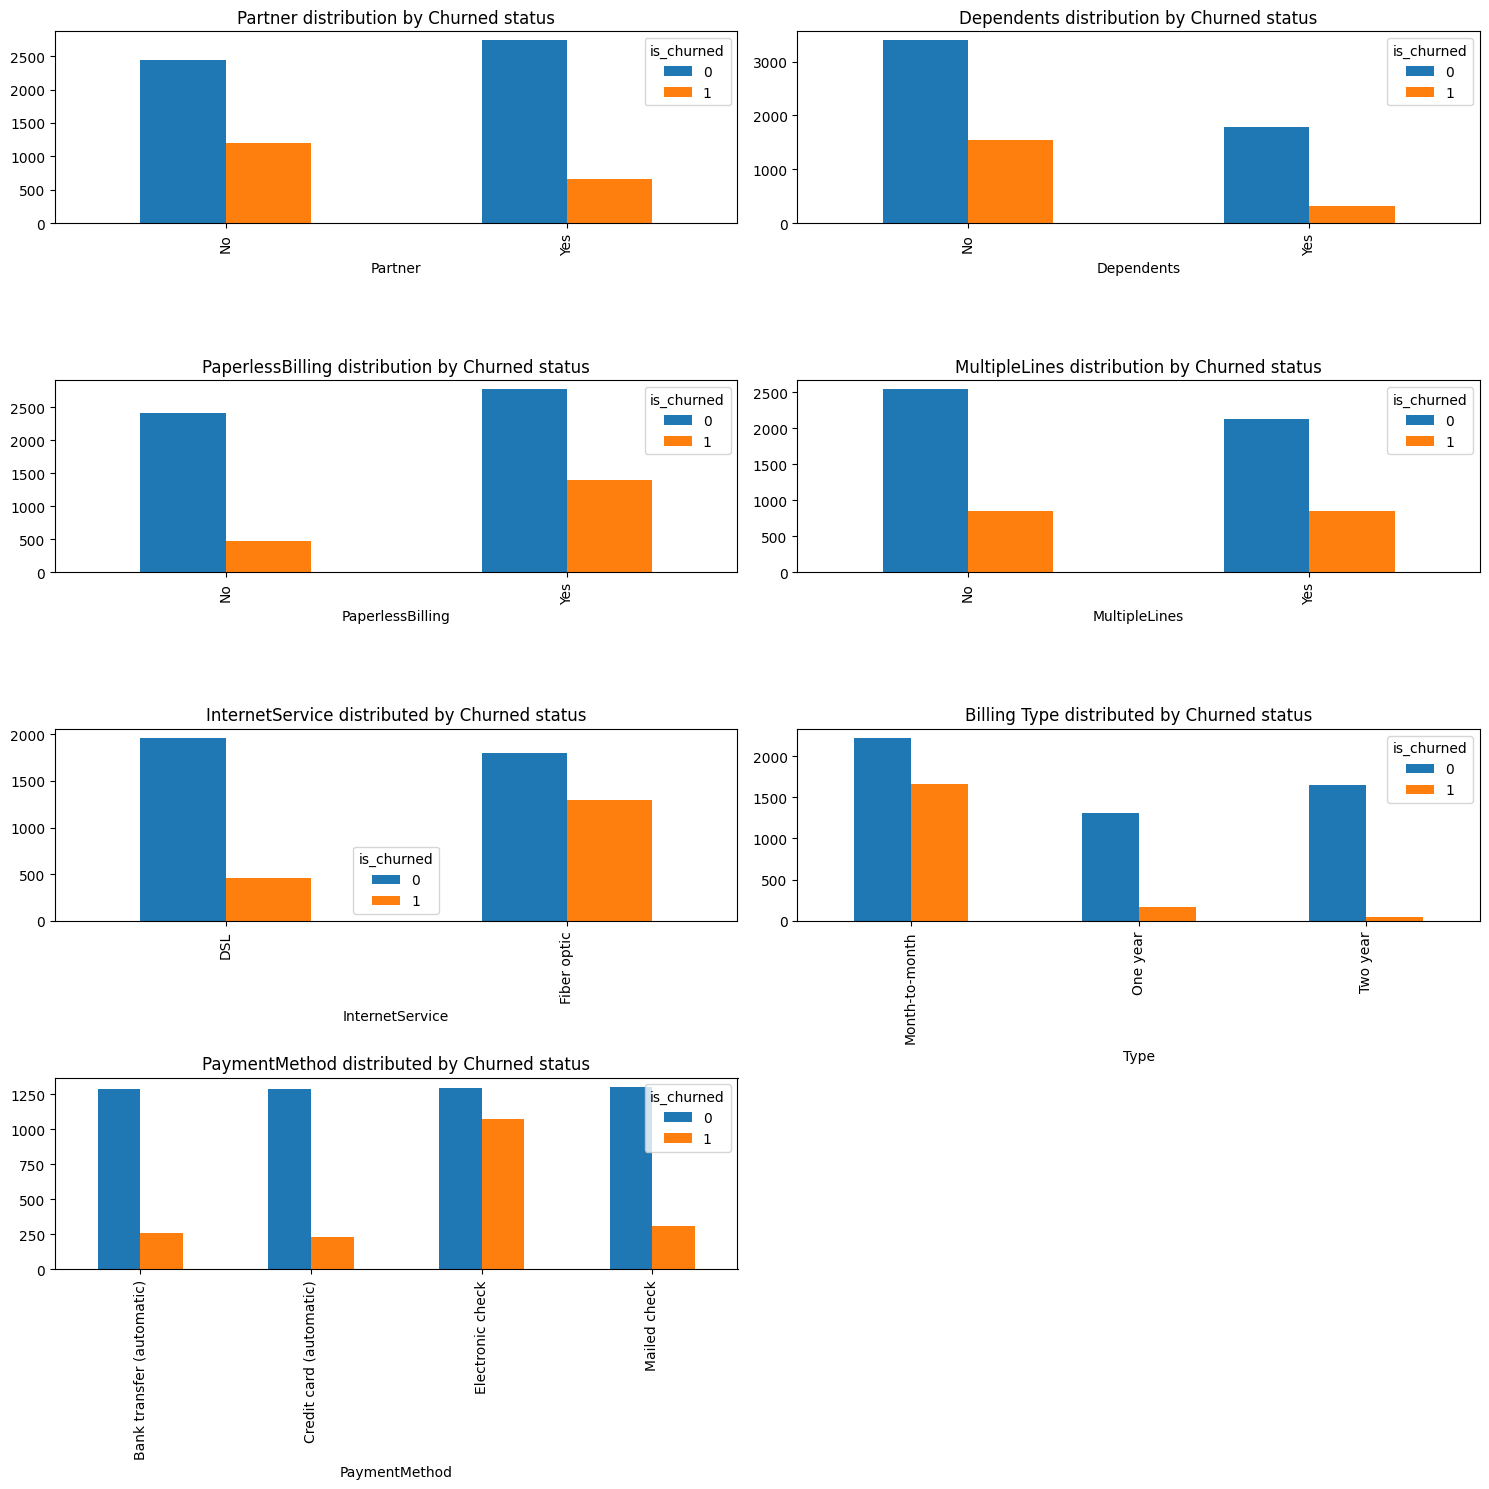

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 7))
cols = {
        'Partner': 'Partner distribution by Churned status',
        'Dependents': 'Dependents distribution by Churned status',
        'PaperlessBilling': 'PaperlessBilling distribution by Churned status',
        'MultipleLines': 'MultipleLines distribution by Churned status',
        'InternetService': 'InternetService distributed by Churned status',
        'Type': 'Billing Type distributed by Churned status',
        'PaymentMethod': 'PaymentMethod distributed by Churned status'
}
for i, (field, title) in enumerate(cols.items()):
    bar_plot(all_df, field, 'is_churned', aggfunc='size', ax=axes.flatten()[i], title=title, axes=axes)

The height of the churned bar for customers without partners is relatively higher than the height of the churned bar for customers with partners. A similar pattern is noted for customers without dependents.

Churning is relatively higher for people who have opted for Paperless billing. Customers with month-to-month billing plan have noticed a relatively higher number of churns.

There appears to be no difference in height of the churn bar for customers with/without multiple telephone lines.

Fiber optic is not popular among the churned customers.

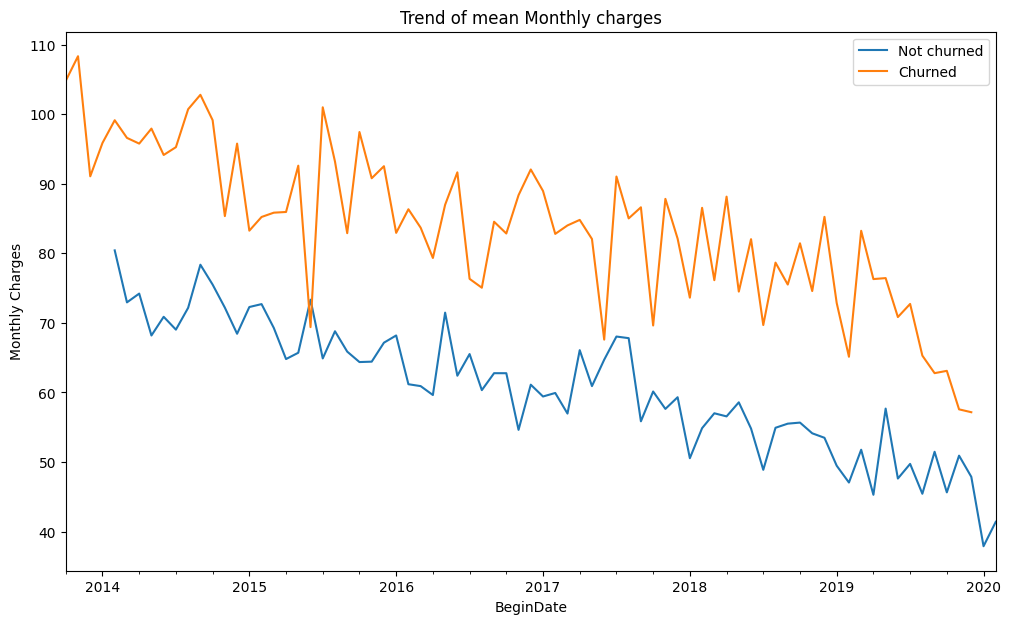

In [ ]:
fig, ax = plt.subplots()
for target in [0, 1]:
    all_df[all_df['is_churned'] == target].groupby('BeginDate')['MonthlyCharges'].mean().plot(label=target, figsize=(12, 7))
plt.legend(labels=['Not churned', 'Churned'])
plt.xlabel('BeginDate')
plt.ylabel('Monthly Charges')
plt.title('Trend of mean Monthly charges')
plt.show()

The mean MonthlyCharges trend shows a decline in revenue. Interestingly, the churners have a relatively higher mean spend compared with the Non-churners.

In [ ]:
all_df['is_churned'].value_counts()

0    5174
1    1869
Name: is_churned, dtype: int64

In [ ]:
all_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

# Overall

1869(27%) of the customers have churned during the period from 2013-10-01 to 2020-02-01.

68% of the churned customers have spent \$70 or more per month. In contrast, 45% of the non-churned customers have spent \$70 or more per month.

There is an almost equal number of male and female customers. However, female customers, on average, spend slightly more on their Monthly bills than do male customers. Among the churned customers, 69% of female customers have a mean spend of \$69 compared with \$67 by males.

1142 (16%) of the customers are SeniorCitizens. Of these, 76% spend \$70 or more on their monthly bills.

Other behaviour noted among the churned customers are:
- a) customers with no dependents or partners tend to easily churn.

- b) Monthly billing gives them an easy exit option.

- c) Paperless billing and Fiber optic internet plan have been a thorn in retaining such customers.

The MonthlyCharges trend in the last 7 years has exprienced a decline in revenue, with churned customers generating an average of \$74 relative to non-churned customers who've spent an average of \$61.

# Carifying questions

Do we have data on which cities the telco's customers are from?

Do we have any information on tickets? The Marketing team can identify pain points not resolved by the customer support, and how long it took to resolve them.

Do we have the ages of the customers or age range? This information will help the marketing team bucket the groups appropriately.

Do we know why there are missing values for TotalCharges, including internet and phone data? These customers have paid for their usage.

Any information on the charges for the various services offered? This will help us infer the missing values better for TotalCharges.

Do we split the data into 3 parts? On which dataset are we testing the model's AUC-ROC?

# Work plan

To explore the data and understand customer churn, an exploratory analysis was conducted focusing on gender, senior citizen status, and other customer characteristics. The datasets were joined using a left join on the CustomerId, which was necessary for modeling.

To address missing values, two approaches were used:

- For the TotalCharges column, missing values were inferred using MonthlyCharges and BeginDate.
- For missing values in phone and internet data, the mode was used for imputation. Alternatively, a Logistic Regression model was employed to fill missing values one by one, reducing potential bias.

Feature engineering included creating new features such as the number of days between EndDate and BeginDate, with 2020-02-01 as the end date for active customers. Additional features were derived from BeginDate, including year, month, day, and day of the week. The number of payments was also calculated using MonthlyCharges and TotalCharges.

For modeling, boolean features were converted using one-hot encoding, while categorical features like Type and PaymentMethods were ordinally encoded. Data types were optimized to reduce size, and redundant features like CustomerId, BeginDate, and EndDate were dropped. The dataset was stratified and split into training, validation, and test sets, with the test set being used only once per model. Class imbalance was addressed by using class weights or upsampling the underrepresented class. A base model was created, and three additional models—Logistic Regression, RandomForestClassifier, and CatBoostClassifier—were built, with 5-fold cross-validation and grid search used to determine the best model for final implementation.

# Feature Engineering

In [ ]:
all_df['num_days'] = ( all_df[['EndDate', 'BeginDate']].apply(lambda x: datetime.datetime.strptime('2020-02-01', '%Y-%m-%d') - x[1] if pd.isna(x[0]) else x[0] - x[1], axis=1)).dt.days

In [ ]:
all_df['year'] = all_df['BeginDate'].dt.year
# all_df['month'] = all_df['BeginDate'].dt.month
# all_df['dayofweek'] = all_df['BeginDate'].dt.dayofweek

In [ ]:
fill_na_cols = all_df.isnull().sum() > 0
fill_na_cols = fill_na_cols[fill_na_cols.values].index.drop(['EndDate', 'TotalCharges'])
temp_df = all_df[fill_na_cols].copy(deep=True)
for col in temp_df.columns:
    temp_df[col] = temp_df[col].apply(lambda x: 0 if x == 'No' else 1)
all_df['num_services'] = temp_df.sum(axis=1)

In [ ]:
for col in fill_na_cols:
    all_df[col] = all_df[col].fillna('No')

In [ ]:
all_df.isnull().mean()

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
BeginDate           0.000000
EndDate             0.734630
Type                0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
is_churned          0.000000
num_days            0.000000
year                0.000000
num_services        0.000000
dtype: float64

In [ ]:
num_col_to_impute = ['TotalCharges']
cat_col_to_impute = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
col_to_drop = ['BeginDate', 'EndDate', 'customerID']
col_to_drop2 = ['BeginDate', 'EndDate', 'customerID', 'num_days',]

In [ ]:
# x_train, x_test = train_test_split(all_df.drop(col_to_drop, axis=1), stratify=all_df['is_churned'], random_state=42, test_size=0.2)

In [ ]:
# x_train.shape, x_test.shape

In [ ]:
x_train2, x_test2 = train_test_split(all_df.drop(col_to_drop2, axis=1), stratify=all_df['is_churned'], random_state=42, test_size=0.1)

In [ ]:
x_train2.shape, x_test2.shape

((6338, 20), (705, 20))

In [ ]:
x_train2['TotalCharges'].mean(), x_train2['TotalCharges'].median()

(2277.735, 1388.75)

In [ ]:
num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
num_imputer2 = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
# x_train[num_col_to_impute] = num_imputer.fit_transform(x_train[num_col_to_impute])
x_train2[num_col_to_impute] = num_imputer2.fit_transform(x_train2[num_col_to_impute])

In [ ]:
# x_test[num_col_to_impute] = num_imputer.transform(x_test[num_col_to_impute])
x_test2[num_col_to_impute] = num_imputer2.transform(x_test2[num_col_to_impute])

In [ ]:
x_train2['TotalCharges'].mean(), x_train2['TotalCharges'].median()

(2276.4728391360845, 1388.75)

In [ ]:
x_train2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
is_churned          0
year                0
num_services        0
dtype: int64

In [ ]:
x_test2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
is_churned          0
year                0
num_services        0
dtype: int64

In [ ]:
# x_train['num_pmt'] = x_train['TotalCharges'] / x_train['MonthlyCharges']
# x_test['num_pmt'] = x_test['TotalCharges'] / x_test['MonthlyCharges']

x_train2['num_pmt'] = x_train2['TotalCharges'] / x_train2['MonthlyCharges']
x_test2['num_pmt'] = x_test2['TotalCharges'] / x_test2['MonthlyCharges']

# Preprocessing

## Standard Scaler

In [ ]:
# std = StandardScaler()
std2 = StandardScaler()

In [ ]:
# x_train[['MonthlyCharges','TotalCharges', 'num_pmt', 'year']] = std.fit_transform(x_train[['MonthlyCharges', 'TotalCharges', 'num_pmt', 'year']])

In [ ]:
x_train2[['MonthlyCharges','TotalCharges', 'num_pmt', 'num_services', 'year']] = std2.fit_transform(x_train2[['MonthlyCharges', 'TotalCharges', 'num_pmt', 'num_services', 'year']])

In [ ]:
# x_test[['MonthlyCharges','TotalCharges', 'num_pmt', 'year']] = std.fit_transform(x_test[['MonthlyCharges','TotalCharges', 'num_pmt', 'year']])

In [ ]:
x_test2[['MonthlyCharges','TotalCharges', 'num_pmt', 'num_services', 'year']] = std2.fit_transform(x_test2[['MonthlyCharges','TotalCharges', 'num_pmt', 'num_services', 'year']])

## Encoding

In [ ]:
# oe = OrdinalEncoder()
oe2 = OrdinalEncoder()

In [ ]:
# x_train[['Type', 'PaymentMethod']] = oe.fit_transform(x_train[['Type', 'PaymentMethod']])
x_train2[['Type', 'PaymentMethod']] = oe2.fit_transform(x_train2[['Type', 'PaymentMethod']])

In [ ]:
# x_test[['Type', 'PaymentMethod']] = oe.transform(x_test[['Type', 'PaymentMethod']])
x_test2[['Type', 'PaymentMethod']] = oe2.transform(x_test2[['Type', 'PaymentMethod']])

In [ ]:
# x_train['SeniorCitizen'] = x_train['SeniorCitizen'].astype(str)
# x_test['SeniorCitizen'] = x_test['SeniorCitizen'].astype(str)

x_train2['SeniorCitizen'] = x_train2['SeniorCitizen'].astype(str)
x_test2['SeniorCitizen'] = x_test2['SeniorCitizen'].astype(str)

In [ ]:
cols_to_dummify = x_train2.select_dtypes(include=['object']).columns.tolist()
# x_train = pd.concat([x_train, pd.get_dummies(x_train[cols_to_dummify], drop_first=True)], axis=1)
# x_test = pd.concat([x_test, pd.get_dummies(x_test[cols_to_dummify], drop_first=True)], axis=1)

x_train2 = pd.concat([x_train2, pd.get_dummies(x_train2[cols_to_dummify], drop_first=True)], axis=1)
x_test2 = pd.concat([x_test2, pd.get_dummies(x_test2[cols_to_dummify], drop_first=True)], axis=1)

In [ ]:
# drop the columns that are dummified
# x_train = x_train.drop(cols_to_dummify, axis=1)
# x_test = x_test.drop(cols_to_dummify, axis=1)

x_train2 = x_train2.drop(cols_to_dummify, axis=1)
x_test2 = x_test2.drop(cols_to_dummify, axis=1)

In [ ]:
x_train2.shape, x_test2.shape

((6338, 22), (705, 22))

In [ ]:
x_train2.head()

,Type,PaymentMethod,MonthlyCharges,TotalCharges,is_churned,year,num_services,num_pmt,gender_Male,SeniorCitizen_1,...,PaperlessBilling_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
5769,2.0,0.0,1.467403,2.375422,0,-1.466503,1.022701,1.545461,0,0,...,1,1,1,0,1,1,1,0,1,1
1834,0.0,2.0,-0.651857,-0.984239,1,1.072199,-1.847081,-1.274573,1,1,...,0,0,0,0,0,0,0,0,0,0
3168,1.0,3.0,-1.505862,-0.548485,0,-0.958763,1.022701,0.857391,0,0,...,1,0,0,1,0,0,0,0,0,0
4205,2.0,1.0,0.459179,-0.189591,0,0.564459,0.544404,-0.359101,0,0,...,0,1,0,0,1,0,1,0,1,1
6218,1.0,0.0,-0.210759,0.810143,0,-1.466503,1.022701,1.551114,0,0,...,1,0,0,0,0,1,1,1,1,1


In [ ]:
x_train2.shape, x_test2.shape

((6338, 22), (705, 22))

In [ ]:
x_train2.dtypes

Type                           float64
PaymentMethod                  float64
MonthlyCharges                 float64
TotalCharges                   float64
is_churned                       int64
year                           float64
num_services                   float64
num_pmt                        float64
gender_Male                      uint8
SeniorCitizen_1                  uint8
Partner_Yes                      uint8
Dependents_Yes                   uint8
PaperlessBilling_Yes             uint8
MultipleLines_Yes                uint8
InternetService_Fiber optic      uint8
InternetService_No               uint8
OnlineSecurity_Yes               uint8
OnlineBackup_Yes                 uint8
DeviceProtection_Yes             uint8
TechSupport_Yes                  uint8
StreamingTV_Yes                  uint8
StreamingMovies_Yes              uint8
dtype: object

In [ ]:
x_test2.dtypes

Type                           float64
PaymentMethod                  float64
MonthlyCharges                 float64
TotalCharges                   float64
is_churned                       int64
year                           float64
num_services                   float64
num_pmt                        float64
gender_Male                      uint8
SeniorCitizen_1                  uint8
Partner_Yes                      uint8
Dependents_Yes                   uint8
PaperlessBilling_Yes             uint8
MultipleLines_Yes                uint8
InternetService_Fiber optic      uint8
InternetService_No               uint8
OnlineSecurity_Yes               uint8
OnlineBackup_Yes                 uint8
DeviceProtection_Yes             uint8
TechSupport_Yes                  uint8
StreamingTV_Yes                  uint8
StreamingMovies_Yes              uint8
dtype: object

In [ ]:
def change_dtypes(df, field, dtype='np.int16'):
    try:
        df[field] = df[field].astype(dtype=dtype)
    except:
        print(f'Dtype conversion failed for {field}')

In [ ]:
cols = {
        'Type': np.uint8,
        'PaymentMethod': np.uint8,
}
for field, dtype in cols.items():
#     change_dtypes(x_train, field, dtype)
#     change_dtypes(x_test, field, dtype)
    change_dtypes(x_train2, field, dtype)
    change_dtypes(x_test2, field, dtype)

In [ ]:
x_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6338 entries, 5769 to 5639
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         6338 non-null   uint8  
 1   PaymentMethod                6338 non-null   uint8  
 2   MonthlyCharges               6338 non-null   float64
 3   TotalCharges                 6338 non-null   float64
 4   is_churned                   6338 non-null   int64  
 5   year                         6338 non-null   float64
 6   num_services                 6338 non-null   float64
 7   num_pmt                      6338 non-null   float64
 8   gender_Male                  6338 non-null   uint8  
 9   SeniorCitizen_1              6338 non-null   uint8  
 10  Partner_Yes                  6338 non-null   uint8  
 11  Dependents_Yes               6338 non-null   uint8  
 12  PaperlessBilling_Yes         6338 non-null   uint8  
 13  MultipleLines_Y

In [ ]:
def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]

        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')

        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score')

        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')

        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'ROC Curve')

        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')

        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

In [ ]:
def roc_auc_scorer(y_true, y_pred):

    return roc_auc_score(y_true, y_pred)

In [ ]:
def sampling(X, y, upsample=True, size=2):

    np.random.seed(42)
    target = None
    if not isinstance(y, np.ndarray):
        target = y.values
    else:
        target = y

    y_pos = np.where(target == 1)[0]
    y_neg = np.where(target == 0)[0]
    X_pos = X[target == 1]
    X_neg = X[target == 0]

    if upsample:
        idx = np.random.choice(y_pos, size=int(len(y_pos)*size))
        if not isinstance(y, np.ndarray):
            X = pd.concat([X.iloc[idx], X_neg])
        else:
            X = np.concatenate([X[idx], X_neg])
        y = np.concatenate([target[idx], target[y_neg]])
    else:
        idx = np.random.choice(y_neg, size=int(len(y_neg)*size))
        if not isinstance(y, np.ndarray):
            X = pd.concat([X.iloc[idx], X_pos])
        else:
            X = np.concatenate([X[idx], X_pos])
        y = np.concatenate([target[idx], target[y_pos]])
    return shuffle(X, y)

In [ ]:
def build_model(model, train_X, train_y, test_X, test_y, hyperparameters={}, scoring=None, cv=5, model_str=None, cat_features=[], early_stopping_rounds=50, verbose=False):

    np.random.seed(42)
    best_score = 0
    start_time = time.time()

    if model_str == 'dummy':
        model.fit(train_X, train_y)
        preds = model.predict_proba(train_X)[:, 1]
        best_score = roc_auc_score(train_y, preds)
        return model, best_score, np.round(time.time() - start_time, 2)

    gs = GridSearchCV(model, param_grid=hyperparameters, cv=cv, scoring=scoring)
    gs.fit(train_X, train_y)

    if model_str == 'cat':
        gs.best_estimator_.fit(train_X, train_y, cat_features=cat_features, verbose=verbose)
    else:
        gs.best_estimator_.fit(train_X, train_y)
    preds = gs.best_estimator_.predict_proba(test_X)[:, 1]
    best_score = roc_auc_score(test_y, preds)
    end_time = time.time() - start_time

    return gs.best_estimator_, best_score, np.round(end_time, 2)

In [ ]:
target = 'is_churned'
# features_train, target_train = x_train.drop([target], axis=1), x_train[target]
# features_test, target_test = x_test.drop([target], axis=1), x_test[target]

features_train2, target_train2 = x_train2.drop([target], axis=1), x_train2[target]
features_test2, target_test2 = x_test2.drop([target], axis=1), x_test2[target]

In [ ]:
features_train2, target_train2 = sampling(x_train2.drop([target], axis=1), x_train2[target], upsample=True, size=1)

In [ ]:
# features_train.shape, target_train.shape, features_test.shape, target_test.shape

In [ ]:
features_train2.shape, target_train2.shape, features_test2.shape, target_test2.shape

((6338, 21), (6338,), (705, 21), (705,))

In [ ]:
# features_train.head()

In [ ]:
features_train2.head()

,Type,PaymentMethod,MonthlyCharges,TotalCharges,year,num_services,num_pmt,gender_Male,SeniorCitizen_1,Partner_Yes,...,PaperlessBilling_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
1057,0,3,0.661487,-0.637123,0.564459,-0.890487,-0.915474,0,0,0,...,1,0,1,0,1,0,0,0,1,0
5621,0,1,0.331493,-0.902902,1.072199,-1.368784,-1.190318,0,0,1,...,1,1,1,0,0,0,0,0,0,0
885,0,3,-1.482646,-0.995289,1.579940,1.022701,-1.274573,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1017,1,0,-1.338377,-0.297857,-1.466503,1.500998,1.355451,0,0,0,...,1,1,0,1,0,0,0,0,0,0
4176,1,0,-1.490938,-0.853147,0.564459,1.022701,-0.611689,1,0,1,...,0,0,0,1,0,0,0,0,0,0


# Train

In [ ]:
dc = DummyClassifier()
best_dc_model, best_dc_auc, best_dc_time = build_model(dc, features_train2, target_train2, features_test2, target_test2, hyperparameters={}, scoring=make_scorer(roc_auc_scorer, needs_threshold=True), cv=2, model_str='dummy')

          train  test
Accuracy   0.73  0.73
F1         0.00  0.00
APS        0.27  0.27
ROC AUC    0.50  0.50


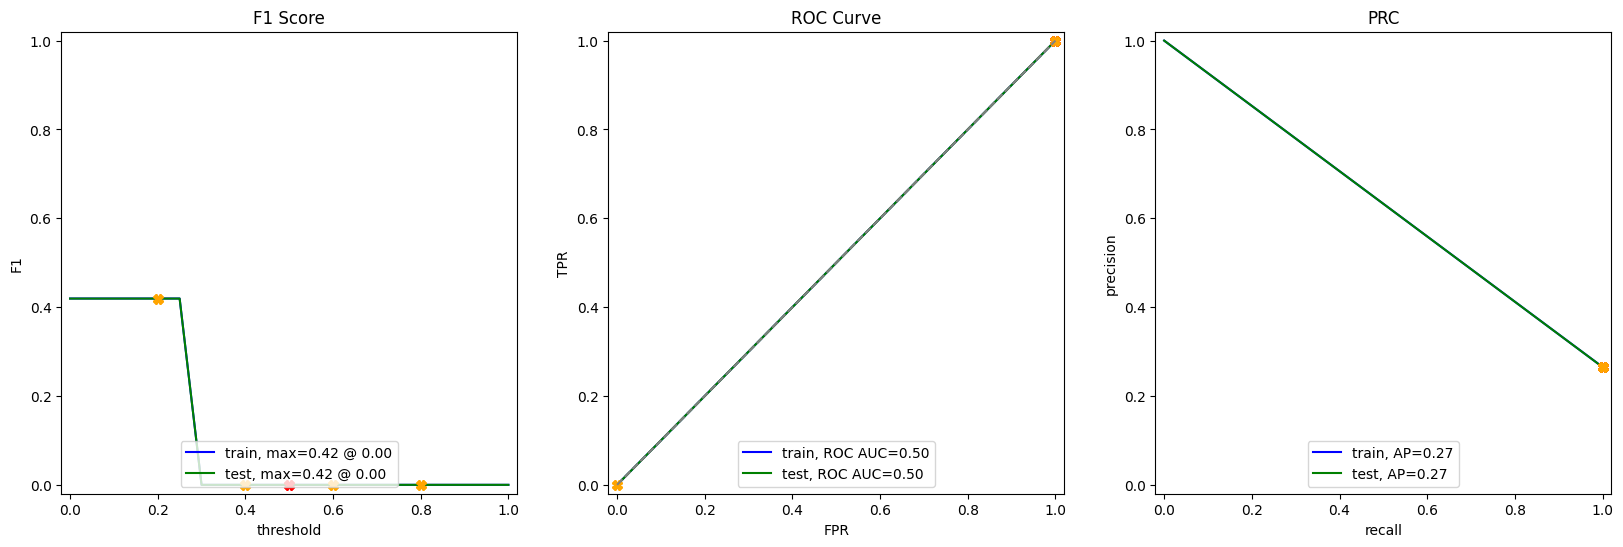

In [ ]:
evaluate_model(best_dc_model, features_train2, target_train2, features_test2, target_test2)

In [ ]:
# with leakage
# lr = LogisticRegression(class_weight='balanced', random_state=42)

# best_lr_model, best_lr_auc, best_lr_time = build_model(lr, features_train, target_train, features_test, target_test, hyperparameters={'C' : [.001, .01, .1, 1, 10]}, scoring=make_scorer(roc_auc_scorer, needs_threshold=True), cv=5)

In [ ]:
# evaluate_model(best_lr_model, features_train, target_train, features_test, target_test)

In [ ]:
# without target leakage
lr2 = LogisticRegression(class_weight='balanced', random_state=42)

best_lr2_model, best_lr2_auc, best_lr2_time = build_model(lr2, features_train2, target_train2, features_test2, target_test2, hyperparameters={'C' : [.001, .01, .1, 1, 10]}, scoring=make_scorer(roc_auc_scorer, needs_threshold=True), cv=5)

          train  test
Accuracy   0.80  0.81
F1         0.69  0.70
APS        0.76  0.80
ROC AUC    0.89  0.90


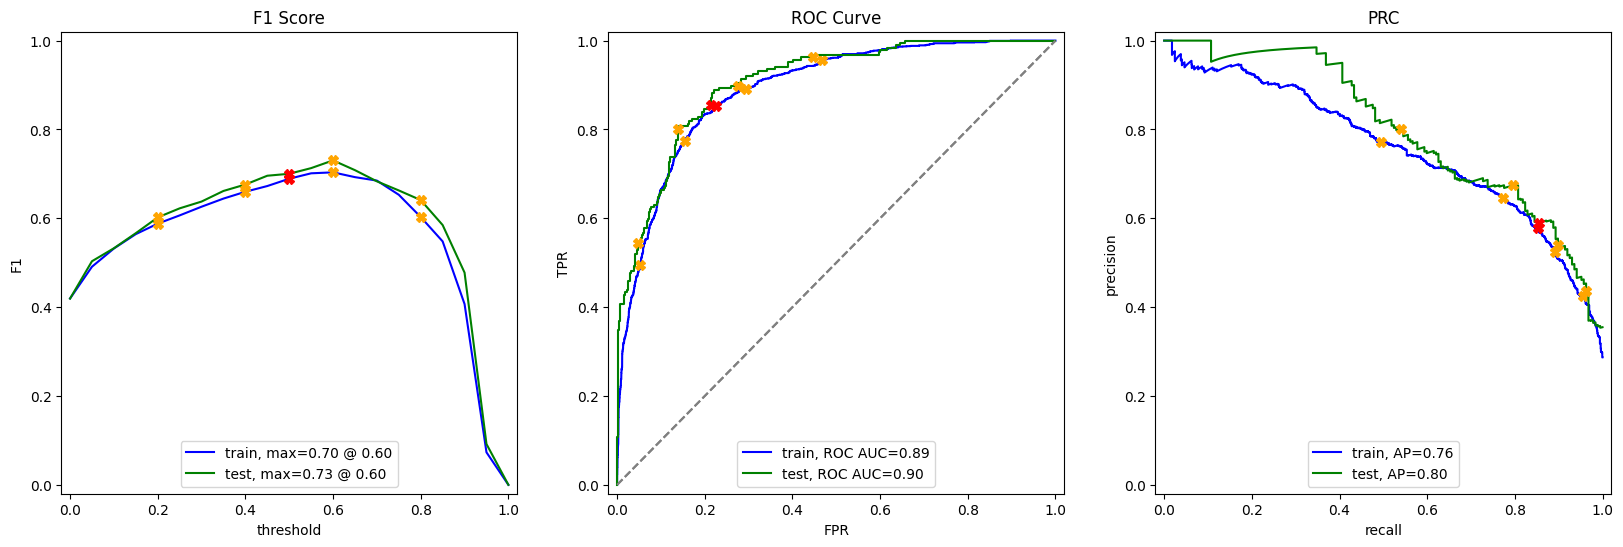

In [ ]:
evaluate_model(best_lr2_model, features_train2, target_train2, features_test2, target_test2)

In [ ]:
# with leakage
# rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# best_rf_model, best_rf_auc, best_rf_time = build_model(rf, features_train, target_train, features_test, target_test, hyperparameters={'n_estimators': range(100, 600, 100), 'max_depth': range(5, 10)}, scoring=make_scorer(roc_auc_scorer, needs_threshold=True), cv=5)

In [ ]:
# evaluate_model(best_rf_model, features_train, target_train, features_test, target_test)

In [ ]:
rf2 = RandomForestClassifier(class_weight='balanced', random_state=42)

best_rf2_model, best_rf2_auc, best_rf2_time = build_model(rf2, features_train2, target_train2, features_test2, target_test2, hyperparameters={'n_estimators': range(100, 600, 100), 'max_depth': range(5, 10)}, scoring=make_scorer(roc_auc_scorer, needs_threshold=True), cv=5)

          train  test
Accuracy   0.88  0.81
F1         0.80  0.67
APS        0.90  0.75
ROC AUC    0.96  0.88


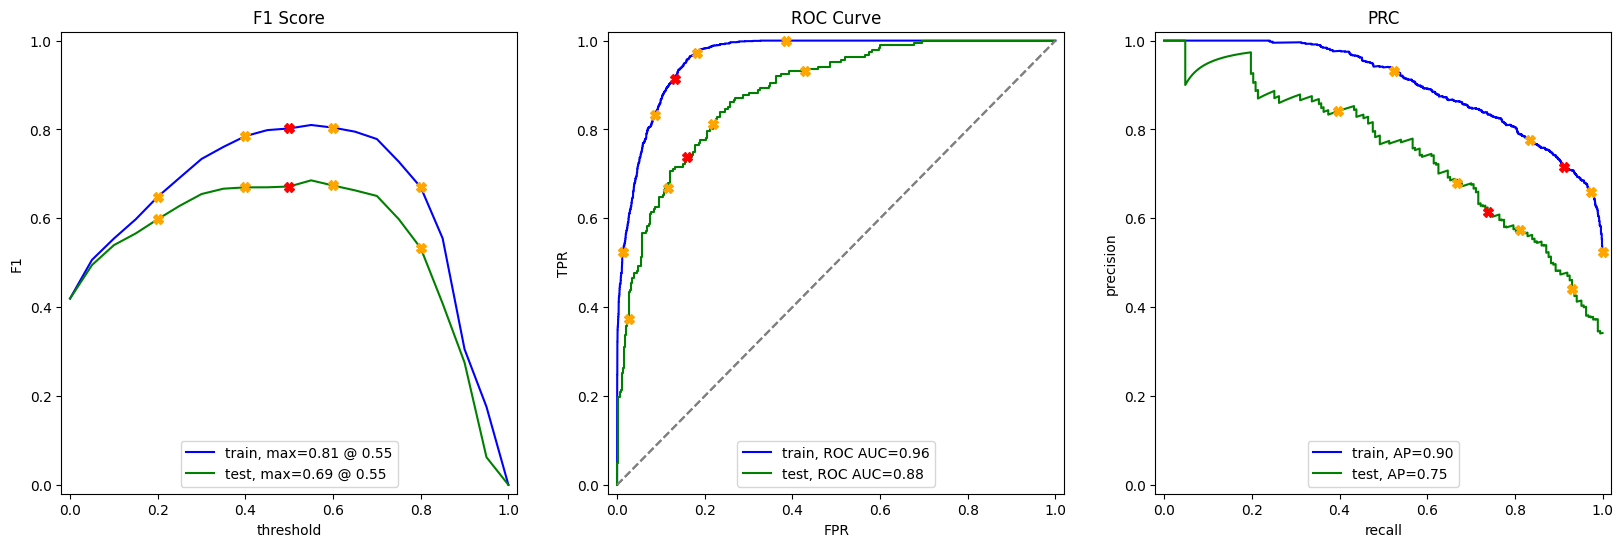

In [ ]:
evaluate_model(best_rf2_model, features_train2, target_train2, features_test2, target_test2)

In [ ]:
# with leakage

# cat = CatBoostClassifier(learning_rate=0.2, loss_function='Logloss', random_seed=42)

# best_cb_model, best_cb_auc, best_cb_time = build_model(cat, features_train, target_train, features_test, target_test, hyperparameters={'iterations': range(100, 600, 100)}, scoring=make_scorer(roc_auc_scorer, needs_threshold=True), cv=5, model_str='catboost', cat_features=cat_features)

In [ ]:
# evaluate_model(best_cb_model, features_train, target_train, features_test, target_test)

In [ ]:
cat_features = x_train2.select_dtypes(include=[np.uint8]).columns
cat2 = CatBoostClassifier(learning_rate=0.2, loss_function='Logloss', random_seed=42)

best_cb2_model, best_cb2_auc, best_cb2_time = build_model(cat2, features_train2, target_train2, features_test2, target_test2, hyperparameters={'iterations': range(100, 600, 100)}, scoring=make_scorer(roc_auc_scorer, needs_threshold=True), cv=5, model_str='catboost', cat_features=cat_features)

0:	learn: 0.5668290	total: 50.5ms	remaining: 5s
1:	learn: 0.4833597	total: 54.6ms	remaining: 2.67s
2:	learn: 0.4348956	total: 58.5ms	remaining: 1.89s
3:	learn: 0.4055641	total: 62.2ms	remaining: 1.49s
4:	learn: 0.3888441	total: 66.1ms	remaining: 1.25s
5:	learn: 0.3756456	total: 70ms	remaining: 1.1s
6:	learn: 0.3677835	total: 73.7ms	remaining: 979ms
7:	learn: 0.3609615	total: 77.4ms	remaining: 890ms
8:	learn: 0.3534075	total: 81.3ms	remaining: 822ms
9:	learn: 0.3488677	total: 85.2ms	remaining: 767ms
10:	learn: 0.3445751	total: 89.1ms	remaining: 721ms
11:	learn: 0.3379414	total: 92.6ms	remaining: 679ms
12:	learn: 0.3352064	total: 95.9ms	remaining: 642ms
13:	learn: 0.3334863	total: 99.4ms	remaining: 610ms
14:	learn: 0.3297016	total: 103ms	remaining: 582ms
15:	learn: 0.3263039	total: 106ms	remaining: 558ms
16:	learn: 0.3249202	total: 110ms	remaining: 535ms
17:	learn: 0.3224491	total: 113ms	remaining: 514ms
18:	learn: 0.3205540	total: 116ms	remaining: 495ms
19:	learn: 0.3169603	total: 119ms

0:	learn: 0.5711179	total: 3.96ms	remaining: 392ms
1:	learn: 0.4921848	total: 8.01ms	remaining: 393ms
2:	learn: 0.4315331	total: 11.9ms	remaining: 383ms
3:	learn: 0.4097753	total: 15.7ms	remaining: 378ms
4:	learn: 0.3949384	total: 19.7ms	remaining: 374ms
5:	learn: 0.3861143	total: 24.2ms	remaining: 379ms
6:	learn: 0.3780780	total: 28.1ms	remaining: 373ms
7:	learn: 0.3719562	total: 31.9ms	remaining: 367ms
8:	learn: 0.3632804	total: 35.6ms	remaining: 360ms
9:	learn: 0.3594306	total: 39.4ms	remaining: 355ms
10:	learn: 0.3536461	total: 43.4ms	remaining: 351ms
11:	learn: 0.3494171	total: 47.3ms	remaining: 347ms
12:	learn: 0.3469561	total: 51.1ms	remaining: 342ms
13:	learn: 0.3455167	total: 54.9ms	remaining: 337ms
14:	learn: 0.3416069	total: 58.8ms	remaining: 333ms
15:	learn: 0.3386195	total: 62.7ms	remaining: 329ms
16:	learn: 0.3353005	total: 66.4ms	remaining: 324ms
17:	learn: 0.3330670	total: 70.3ms	remaining: 320ms
18:	learn: 0.3311551	total: 74ms	remaining: 315ms
19:	learn: 0.3257221	tot

0:	learn: 0.5701154	total: 5.84ms	remaining: 579ms
1:	learn: 0.4879471	total: 11.4ms	remaining: 560ms
2:	learn: 0.4446803	total: 15.7ms	remaining: 507ms
3:	learn: 0.4112222	total: 19.8ms	remaining: 475ms
4:	learn: 0.3977514	total: 22.2ms	remaining: 423ms
5:	learn: 0.3854045	total: 26.3ms	remaining: 412ms
6:	learn: 0.3756396	total: 30.5ms	remaining: 405ms
7:	learn: 0.3699255	total: 34.8ms	remaining: 400ms
8:	learn: 0.3646942	total: 38.8ms	remaining: 393ms
9:	learn: 0.3608938	total: 43.4ms	remaining: 390ms
10:	learn: 0.3563699	total: 47.7ms	remaining: 386ms
11:	learn: 0.3545685	total: 51.8ms	remaining: 380ms
12:	learn: 0.3498805	total: 55.8ms	remaining: 373ms
13:	learn: 0.3479749	total: 60ms	remaining: 369ms
14:	learn: 0.3427404	total: 64.2ms	remaining: 364ms
15:	learn: 0.3374696	total: 67.8ms	remaining: 356ms
16:	learn: 0.3352747	total: 71.3ms	remaining: 348ms
17:	learn: 0.3332838	total: 74.7ms	remaining: 340ms
18:	learn: 0.3297660	total: 78.3ms	remaining: 334ms
19:	learn: 0.3274450	tot

112:	learn: 0.1844783	total: 400ms	remaining: 308ms
113:	learn: 0.1838727	total: 405ms	remaining: 305ms
114:	learn: 0.1832491	total: 409ms	remaining: 302ms
115:	learn: 0.1825390	total: 413ms	remaining: 299ms
116:	learn: 0.1816753	total: 416ms	remaining: 295ms
117:	learn: 0.1807022	total: 419ms	remaining: 291ms
118:	learn: 0.1800823	total: 423ms	remaining: 288ms
119:	learn: 0.1792918	total: 426ms	remaining: 284ms
120:	learn: 0.1784194	total: 430ms	remaining: 280ms
121:	learn: 0.1772078	total: 433ms	remaining: 277ms
122:	learn: 0.1762206	total: 436ms	remaining: 273ms
123:	learn: 0.1747596	total: 440ms	remaining: 269ms
124:	learn: 0.1742799	total: 443ms	remaining: 266ms
125:	learn: 0.1732069	total: 447ms	remaining: 262ms
126:	learn: 0.1725805	total: 450ms	remaining: 259ms
127:	learn: 0.1718778	total: 453ms	remaining: 255ms
128:	learn: 0.1713406	total: 457ms	remaining: 251ms
129:	learn: 0.1709705	total: 460ms	remaining: 248ms
130:	learn: 0.1705980	total: 463ms	remaining: 244ms
131:	learn: 

112:	learn: 0.1849537	total: 398ms	remaining: 306ms
113:	learn: 0.1840524	total: 401ms	remaining: 303ms
114:	learn: 0.1830994	total: 405ms	remaining: 299ms
115:	learn: 0.1825813	total: 408ms	remaining: 296ms
116:	learn: 0.1819269	total: 412ms	remaining: 292ms
117:	learn: 0.1810952	total: 415ms	remaining: 288ms
118:	learn: 0.1800014	total: 418ms	remaining: 285ms
119:	learn: 0.1787540	total: 422ms	remaining: 281ms
120:	learn: 0.1780645	total: 425ms	remaining: 277ms
121:	learn: 0.1773045	total: 428ms	remaining: 274ms
122:	learn: 0.1765147	total: 432ms	remaining: 270ms
123:	learn: 0.1760378	total: 435ms	remaining: 267ms
124:	learn: 0.1755776	total: 439ms	remaining: 263ms
125:	learn: 0.1748759	total: 442ms	remaining: 260ms
126:	learn: 0.1740493	total: 446ms	remaining: 256ms
127:	learn: 0.1730729	total: 449ms	remaining: 253ms
128:	learn: 0.1719401	total: 452ms	remaining: 249ms
129:	learn: 0.1712094	total: 460ms	remaining: 248ms
130:	learn: 0.1702028	total: 463ms	remaining: 244ms
131:	learn: 

113:	learn: 0.1867461	total: 398ms	remaining: 300ms
114:	learn: 0.1858705	total: 401ms	remaining: 297ms
115:	learn: 0.1850047	total: 405ms	remaining: 293ms
116:	learn: 0.1843009	total: 408ms	remaining: 289ms
117:	learn: 0.1832119	total: 412ms	remaining: 286ms
118:	learn: 0.1822079	total: 415ms	remaining: 283ms
119:	learn: 0.1810441	total: 418ms	remaining: 279ms
120:	learn: 0.1805532	total: 422ms	remaining: 275ms
121:	learn: 0.1798162	total: 425ms	remaining: 272ms
122:	learn: 0.1790887	total: 429ms	remaining: 268ms
123:	learn: 0.1786217	total: 436ms	remaining: 267ms
124:	learn: 0.1780625	total: 440ms	remaining: 264ms
125:	learn: 0.1774128	total: 444ms	remaining: 261ms
126:	learn: 0.1768934	total: 447ms	remaining: 257ms
127:	learn: 0.1759597	total: 451ms	remaining: 254ms
128:	learn: 0.1758229	total: 455ms	remaining: 250ms
129:	learn: 0.1752975	total: 459ms	remaining: 247ms
130:	learn: 0.1742889	total: 462ms	remaining: 244ms
131:	learn: 0.1732187	total: 467ms	remaining: 240ms
132:	learn: 

116:	learn: 0.1768608	total: 400ms	remaining: 284ms
117:	learn: 0.1762098	total: 404ms	remaining: 280ms
118:	learn: 0.1758792	total: 407ms	remaining: 277ms
119:	learn: 0.1747747	total: 410ms	remaining: 274ms
120:	learn: 0.1741854	total: 414ms	remaining: 270ms
121:	learn: 0.1732451	total: 417ms	remaining: 267ms
122:	learn: 0.1724498	total: 421ms	remaining: 263ms
123:	learn: 0.1712729	total: 424ms	remaining: 260ms
124:	learn: 0.1708130	total: 427ms	remaining: 256ms
125:	learn: 0.1699616	total: 431ms	remaining: 253ms
126:	learn: 0.1694992	total: 434ms	remaining: 250ms
127:	learn: 0.1683564	total: 438ms	remaining: 246ms
128:	learn: 0.1672683	total: 441ms	remaining: 243ms
129:	learn: 0.1663037	total: 444ms	remaining: 239ms
130:	learn: 0.1653983	total: 448ms	remaining: 236ms
131:	learn: 0.1647403	total: 451ms	remaining: 232ms
132:	learn: 0.1639831	total: 455ms	remaining: 229ms
133:	learn: 0.1629033	total: 458ms	remaining: 226ms
134:	learn: 0.1620278	total: 461ms	remaining: 222ms
135:	learn: 

114:	learn: 0.1912287	total: 404ms	remaining: 298ms
115:	learn: 0.1907186	total: 407ms	remaining: 295ms
116:	learn: 0.1896558	total: 411ms	remaining: 291ms
117:	learn: 0.1887537	total: 415ms	remaining: 288ms
118:	learn: 0.1875377	total: 418ms	remaining: 285ms
119:	learn: 0.1862454	total: 422ms	remaining: 281ms
120:	learn: 0.1854875	total: 425ms	remaining: 278ms
121:	learn: 0.1846837	total: 429ms	remaining: 274ms
122:	learn: 0.1839251	total: 432ms	remaining: 271ms
123:	learn: 0.1829017	total: 436ms	remaining: 267ms
124:	learn: 0.1819499	total: 439ms	remaining: 263ms
125:	learn: 0.1813793	total: 442ms	remaining: 260ms
126:	learn: 0.1810580	total: 445ms	remaining: 256ms
127:	learn: 0.1802544	total: 449ms	remaining: 252ms
128:	learn: 0.1792260	total: 452ms	remaining: 249ms
129:	learn: 0.1785254	total: 456ms	remaining: 245ms
130:	learn: 0.1776609	total: 459ms	remaining: 242ms
131:	learn: 0.1768096	total: 463ms	remaining: 238ms
132:	learn: 0.1762003	total: 466ms	remaining: 235ms
133:	learn: 

112:	learn: 0.1844783	total: 405ms	remaining: 670ms
113:	learn: 0.1838727	total: 408ms	remaining: 666ms
114:	learn: 0.1832491	total: 412ms	remaining: 662ms
115:	learn: 0.1825390	total: 415ms	remaining: 658ms
116:	learn: 0.1816753	total: 418ms	remaining: 654ms
117:	learn: 0.1807022	total: 422ms	remaining: 650ms
118:	learn: 0.1800823	total: 425ms	remaining: 646ms
119:	learn: 0.1792918	total: 428ms	remaining: 642ms
120:	learn: 0.1784194	total: 436ms	remaining: 644ms
121:	learn: 0.1772078	total: 439ms	remaining: 641ms
122:	learn: 0.1762206	total: 442ms	remaining: 637ms
123:	learn: 0.1747596	total: 446ms	remaining: 633ms
124:	learn: 0.1742799	total: 449ms	remaining: 629ms
125:	learn: 0.1732069	total: 453ms	remaining: 625ms
126:	learn: 0.1725805	total: 456ms	remaining: 621ms
127:	learn: 0.1718778	total: 460ms	remaining: 618ms
128:	learn: 0.1713406	total: 463ms	remaining: 614ms
129:	learn: 0.1709705	total: 466ms	remaining: 610ms
130:	learn: 0.1705980	total: 469ms	remaining: 606ms
131:	learn: 

286:	learn: 0.0926164	total: 1s	remaining: 45.4ms
287:	learn: 0.0922426	total: 1.01s	remaining: 41.9ms
288:	learn: 0.0919957	total: 1.01s	remaining: 38.5ms
289:	learn: 0.0915783	total: 1.01s	remaining: 35ms
290:	learn: 0.0912498	total: 1.02s	remaining: 31.5ms
291:	learn: 0.0909127	total: 1.02s	remaining: 28.1ms
292:	learn: 0.0905782	total: 1.03s	remaining: 24.6ms
293:	learn: 0.0901756	total: 1.03s	remaining: 21ms
294:	learn: 0.0899067	total: 1.03s	remaining: 17.5ms
295:	learn: 0.0895875	total: 1.04s	remaining: 14ms
296:	learn: 0.0893257	total: 1.04s	remaining: 10.5ms
297:	learn: 0.0891582	total: 1.04s	remaining: 7.01ms
298:	learn: 0.0888476	total: 1.05s	remaining: 3.51ms
299:	learn: 0.0885370	total: 1.05s	remaining: 0us
0:	learn: 0.5660314	total: 3.52ms	remaining: 1.05s
1:	learn: 0.4840894	total: 6.89ms	remaining: 1.03s
2:	learn: 0.4432133	total: 10.4ms	remaining: 1.03s
3:	learn: 0.4074310	total: 13.7ms	remaining: 1.01s
4:	learn: 0.3901288	total: 17.2ms	remaining: 1.01s
5:	learn: 0.379

176:	learn: 0.1414047	total: 642ms	remaining: 446ms
177:	learn: 0.1410041	total: 646ms	remaining: 443ms
178:	learn: 0.1407320	total: 650ms	remaining: 439ms
179:	learn: 0.1404274	total: 653ms	remaining: 435ms
180:	learn: 0.1400355	total: 657ms	remaining: 432ms
181:	learn: 0.1396132	total: 660ms	remaining: 428ms
182:	learn: 0.1390330	total: 664ms	remaining: 424ms
183:	learn: 0.1383715	total: 667ms	remaining: 421ms
184:	learn: 0.1379539	total: 671ms	remaining: 417ms
185:	learn: 0.1374839	total: 674ms	remaining: 413ms
186:	learn: 0.1371040	total: 678ms	remaining: 409ms
187:	learn: 0.1365024	total: 681ms	remaining: 406ms
188:	learn: 0.1356864	total: 684ms	remaining: 402ms
189:	learn: 0.1351773	total: 688ms	remaining: 398ms
190:	learn: 0.1348986	total: 691ms	remaining: 394ms
191:	learn: 0.1345725	total: 695ms	remaining: 391ms
192:	learn: 0.1339155	total: 698ms	remaining: 387ms
193:	learn: 0.1331805	total: 701ms	remaining: 383ms
194:	learn: 0.1324678	total: 705ms	remaining: 380ms
195:	learn: 

72:	learn: 0.2288034	total: 248ms	remaining: 770ms
73:	learn: 0.2267339	total: 251ms	remaining: 767ms
74:	learn: 0.2254417	total: 255ms	remaining: 764ms
75:	learn: 0.2246222	total: 258ms	remaining: 760ms
76:	learn: 0.2238745	total: 261ms	remaining: 756ms
77:	learn: 0.2223254	total: 264ms	remaining: 752ms
78:	learn: 0.2208259	total: 268ms	remaining: 749ms
79:	learn: 0.2198801	total: 271ms	remaining: 745ms
80:	learn: 0.2190057	total: 274ms	remaining: 741ms
81:	learn: 0.2177105	total: 278ms	remaining: 738ms
82:	learn: 0.2168156	total: 281ms	remaining: 734ms
83:	learn: 0.2157285	total: 284ms	remaining: 731ms
84:	learn: 0.2147738	total: 287ms	remaining: 727ms
85:	learn: 0.2133179	total: 291ms	remaining: 724ms
86:	learn: 0.2118306	total: 294ms	remaining: 721ms
87:	learn: 0.2109823	total: 298ms	remaining: 718ms
88:	learn: 0.2103036	total: 301ms	remaining: 714ms
89:	learn: 0.2091102	total: 304ms	remaining: 710ms
90:	learn: 0.2083121	total: 307ms	remaining: 706ms
91:	learn: 0.2072231	total: 311

246:	learn: 0.1088611	total: 850ms	remaining: 182ms
247:	learn: 0.1081961	total: 854ms	remaining: 179ms
248:	learn: 0.1078821	total: 857ms	remaining: 176ms
249:	learn: 0.1074346	total: 860ms	remaining: 172ms
250:	learn: 0.1071375	total: 864ms	remaining: 169ms
251:	learn: 0.1066404	total: 867ms	remaining: 165ms
252:	learn: 0.1062179	total: 870ms	remaining: 162ms
253:	learn: 0.1057483	total: 874ms	remaining: 158ms
254:	learn: 0.1056105	total: 877ms	remaining: 155ms
255:	learn: 0.1051670	total: 880ms	remaining: 151ms
256:	learn: 0.1048349	total: 884ms	remaining: 148ms
257:	learn: 0.1044326	total: 887ms	remaining: 144ms
258:	learn: 0.1042654	total: 890ms	remaining: 141ms
259:	learn: 0.1039293	total: 893ms	remaining: 137ms
260:	learn: 0.1035783	total: 896ms	remaining: 134ms
261:	learn: 0.1032931	total: 900ms	remaining: 131ms
262:	learn: 0.1030164	total: 903ms	remaining: 127ms
263:	learn: 0.1026976	total: 907ms	remaining: 124ms
264:	learn: 0.1021085	total: 910ms	remaining: 120ms
265:	learn: 

119:	learn: 0.1747747	total: 402ms	remaining: 603ms
120:	learn: 0.1741854	total: 406ms	remaining: 600ms
121:	learn: 0.1732451	total: 409ms	remaining: 597ms
122:	learn: 0.1724498	total: 412ms	remaining: 593ms
123:	learn: 0.1712729	total: 416ms	remaining: 590ms
124:	learn: 0.1708130	total: 419ms	remaining: 586ms
125:	learn: 0.1699616	total: 422ms	remaining: 583ms
126:	learn: 0.1694992	total: 426ms	remaining: 580ms
127:	learn: 0.1683564	total: 429ms	remaining: 577ms
128:	learn: 0.1672683	total: 433ms	remaining: 573ms
129:	learn: 0.1663037	total: 436ms	remaining: 570ms
130:	learn: 0.1653983	total: 439ms	remaining: 567ms
131:	learn: 0.1647403	total: 443ms	remaining: 564ms
132:	learn: 0.1639831	total: 446ms	remaining: 560ms
133:	learn: 0.1629033	total: 450ms	remaining: 557ms
134:	learn: 0.1620278	total: 453ms	remaining: 553ms
135:	learn: 0.1613611	total: 460ms	remaining: 555ms
136:	learn: 0.1609586	total: 463ms	remaining: 551ms
137:	learn: 0.1603021	total: 467ms	remaining: 548ms
138:	learn: 

290:	learn: 0.0888484	total: 999ms	remaining: 30.9ms
291:	learn: 0.0887552	total: 1s	remaining: 27.5ms
292:	learn: 0.0883288	total: 1.01s	remaining: 24ms
293:	learn: 0.0880753	total: 1.01s	remaining: 20.6ms
294:	learn: 0.0879763	total: 1.01s	remaining: 17.2ms
295:	learn: 0.0874279	total: 1.02s	remaining: 13.7ms
296:	learn: 0.0869610	total: 1.02s	remaining: 10.3ms
297:	learn: 0.0866359	total: 1.02s	remaining: 6.86ms
298:	learn: 0.0863519	total: 1.03s	remaining: 3.43ms
299:	learn: 0.0861974	total: 1.03s	remaining: 0us
0:	learn: 0.5701154	total: 3.45ms	remaining: 1.03s
1:	learn: 0.4879471	total: 6.91ms	remaining: 1.03s
2:	learn: 0.4446803	total: 10.3ms	remaining: 1.02s
3:	learn: 0.4112222	total: 13.5ms	remaining: 1s
4:	learn: 0.3977514	total: 15.4ms	remaining: 909ms
5:	learn: 0.3854045	total: 18.8ms	remaining: 920ms
6:	learn: 0.3756396	total: 22.4ms	remaining: 936ms
7:	learn: 0.3699255	total: 26ms	remaining: 948ms
8:	learn: 0.3646942	total: 29.4ms	remaining: 950ms
9:	learn: 0.3608938	tota

188:	learn: 0.1410085	total: 651ms	remaining: 382ms
189:	learn: 0.1405548	total: 654ms	remaining: 379ms
190:	learn: 0.1400147	total: 658ms	remaining: 375ms
191:	learn: 0.1394265	total: 661ms	remaining: 372ms
192:	learn: 0.1387157	total: 664ms	remaining: 368ms
193:	learn: 0.1382132	total: 668ms	remaining: 365ms
194:	learn: 0.1375249	total: 671ms	remaining: 361ms
195:	learn: 0.1371622	total: 675ms	remaining: 358ms
196:	learn: 0.1364707	total: 678ms	remaining: 354ms
197:	learn: 0.1359025	total: 681ms	remaining: 351ms
198:	learn: 0.1350391	total: 689ms	remaining: 350ms
199:	learn: 0.1345166	total: 694ms	remaining: 347ms
200:	learn: 0.1341042	total: 697ms	remaining: 344ms
201:	learn: 0.1334026	total: 701ms	remaining: 340ms
202:	learn: 0.1329398	total: 704ms	remaining: 337ms
203:	learn: 0.1325052	total: 708ms	remaining: 333ms
204:	learn: 0.1319779	total: 711ms	remaining: 330ms
205:	learn: 0.1315673	total: 715ms	remaining: 326ms
206:	learn: 0.1308207	total: 718ms	remaining: 323ms
207:	learn: 

78:	learn: 0.2193424	total: 281ms	remaining: 1.14s
79:	learn: 0.2186225	total: 284ms	remaining: 1.14s
80:	learn: 0.2175389	total: 288ms	remaining: 1.13s
81:	learn: 0.2165006	total: 291ms	remaining: 1.13s
82:	learn: 0.2157160	total: 295ms	remaining: 1.13s
83:	learn: 0.2146853	total: 298ms	remaining: 1.12s
84:	learn: 0.2143119	total: 306ms	remaining: 1.13s
85:	learn: 0.2131807	total: 310ms	remaining: 1.13s
86:	learn: 0.2118195	total: 313ms	remaining: 1.13s
87:	learn: 0.2107805	total: 316ms	remaining: 1.12s
88:	learn: 0.2098234	total: 320ms	remaining: 1.12s
89:	learn: 0.2085056	total: 323ms	remaining: 1.11s
90:	learn: 0.2079957	total: 327ms	remaining: 1.11s
91:	learn: 0.2069207	total: 330ms	remaining: 1.1s
92:	learn: 0.2051463	total: 333ms	remaining: 1.1s
93:	learn: 0.2041295	total: 337ms	remaining: 1.09s
94:	learn: 0.2024102	total: 340ms	remaining: 1.09s
95:	learn: 0.2017609	total: 343ms	remaining: 1.09s
96:	learn: 0.2008969	total: 347ms	remaining: 1.08s
97:	learn: 0.2001193	total: 350ms

247:	learn: 0.1056971	total: 877ms	remaining: 537ms
248:	learn: 0.1053523	total: 881ms	remaining: 534ms
249:	learn: 0.1048789	total: 884ms	remaining: 530ms
250:	learn: 0.1045614	total: 887ms	remaining: 527ms
251:	learn: 0.1040244	total: 895ms	remaining: 525ms
252:	learn: 0.1035506	total: 898ms	remaining: 522ms
253:	learn: 0.1032879	total: 902ms	remaining: 518ms
254:	learn: 0.1030678	total: 905ms	remaining: 515ms
255:	learn: 0.1028254	total: 908ms	remaining: 511ms
256:	learn: 0.1026805	total: 912ms	remaining: 507ms
257:	learn: 0.1022967	total: 915ms	remaining: 504ms
258:	learn: 0.1018959	total: 919ms	remaining: 500ms
259:	learn: 0.1016288	total: 922ms	remaining: 496ms
260:	learn: 0.1012545	total: 925ms	remaining: 493ms
261:	learn: 0.1009033	total: 928ms	remaining: 489ms
262:	learn: 0.1002764	total: 932ms	remaining: 485ms
263:	learn: 0.0999745	total: 935ms	remaining: 482ms
264:	learn: 0.0996979	total: 938ms	remaining: 478ms
265:	learn: 0.0993061	total: 942ms	remaining: 474ms
266:	learn: 

59:	learn: 0.2444311	total: 204ms	remaining: 1.16s
60:	learn: 0.2428476	total: 208ms	remaining: 1.16s
61:	learn: 0.2415673	total: 212ms	remaining: 1.16s
62:	learn: 0.2397805	total: 216ms	remaining: 1.16s
63:	learn: 0.2387614	total: 220ms	remaining: 1.15s
64:	learn: 0.2370128	total: 224ms	remaining: 1.15s
65:	learn: 0.2357739	total: 227ms	remaining: 1.15s
66:	learn: 0.2347141	total: 231ms	remaining: 1.15s
67:	learn: 0.2330207	total: 235ms	remaining: 1.15s
68:	learn: 0.2314697	total: 239ms	remaining: 1.15s
69:	learn: 0.2302733	total: 243ms	remaining: 1.14s
70:	learn: 0.2287383	total: 247ms	remaining: 1.14s
71:	learn: 0.2273510	total: 250ms	remaining: 1.14s
72:	learn: 0.2260202	total: 254ms	remaining: 1.14s
73:	learn: 0.2249090	total: 258ms	remaining: 1.14s
74:	learn: 0.2239018	total: 261ms	remaining: 1.13s
75:	learn: 0.2234885	total: 265ms	remaining: 1.13s
76:	learn: 0.2221644	total: 268ms	remaining: 1.12s
77:	learn: 0.2209654	total: 272ms	remaining: 1.12s
78:	learn: 0.2201427	total: 275

228:	learn: 0.1170398	total: 797ms	remaining: 595ms
229:	learn: 0.1165244	total: 801ms	remaining: 592ms
230:	learn: 0.1159012	total: 805ms	remaining: 589ms
231:	learn: 0.1153820	total: 808ms	remaining: 585ms
232:	learn: 0.1151239	total: 811ms	remaining: 581ms
233:	learn: 0.1148909	total: 815ms	remaining: 578ms
234:	learn: 0.1145282	total: 818ms	remaining: 574ms
235:	learn: 0.1142415	total: 821ms	remaining: 571ms
236:	learn: 0.1137873	total: 825ms	remaining: 567ms
237:	learn: 0.1135828	total: 833ms	remaining: 567ms
238:	learn: 0.1132297	total: 836ms	remaining: 563ms
239:	learn: 0.1127842	total: 839ms	remaining: 559ms
240:	learn: 0.1124207	total: 843ms	remaining: 556ms
241:	learn: 0.1119574	total: 846ms	remaining: 552ms
242:	learn: 0.1116434	total: 849ms	remaining: 549ms
243:	learn: 0.1111902	total: 853ms	remaining: 545ms
244:	learn: 0.1107258	total: 857ms	remaining: 542ms
245:	learn: 0.1098750	total: 860ms	remaining: 538ms
246:	learn: 0.1095683	total: 864ms	remaining: 535ms
247:	learn: 

0:	learn: 0.5711179	total: 3.88ms	remaining: 1.55s
1:	learn: 0.4921848	total: 7.85ms	remaining: 1.56s
2:	learn: 0.4315331	total: 11.6ms	remaining: 1.54s
3:	learn: 0.4097753	total: 15.5ms	remaining: 1.53s
4:	learn: 0.3949384	total: 19.4ms	remaining: 1.53s
5:	learn: 0.3861143	total: 23.1ms	remaining: 1.52s
6:	learn: 0.3780780	total: 26.9ms	remaining: 1.51s
7:	learn: 0.3719562	total: 30.7ms	remaining: 1.5s
8:	learn: 0.3632804	total: 34.5ms	remaining: 1.5s
9:	learn: 0.3594306	total: 38.2ms	remaining: 1.49s
10:	learn: 0.3536461	total: 41.9ms	remaining: 1.48s
11:	learn: 0.3494171	total: 45.7ms	remaining: 1.48s
12:	learn: 0.3469561	total: 49.4ms	remaining: 1.47s
13:	learn: 0.3455167	total: 53ms	remaining: 1.46s
14:	learn: 0.3416069	total: 57ms	remaining: 1.46s
15:	learn: 0.3386195	total: 60.9ms	remaining: 1.46s
16:	learn: 0.3353005	total: 64.6ms	remaining: 1.45s
17:	learn: 0.3330670	total: 68.3ms	remaining: 1.45s
18:	learn: 0.3311551	total: 72ms	remaining: 1.44s
19:	learn: 0.3257221	total: 75

173:	learn: 0.1440861	total: 601ms	remaining: 781ms
174:	learn: 0.1435245	total: 605ms	remaining: 777ms
175:	learn: 0.1430474	total: 608ms	remaining: 774ms
176:	learn: 0.1424888	total: 611ms	remaining: 770ms
177:	learn: 0.1420626	total: 615ms	remaining: 767ms
178:	learn: 0.1415085	total: 618ms	remaining: 763ms
179:	learn: 0.1408148	total: 621ms	remaining: 760ms
180:	learn: 0.1399608	total: 625ms	remaining: 756ms
181:	learn: 0.1396589	total: 628ms	remaining: 753ms
182:	learn: 0.1392135	total: 632ms	remaining: 749ms
183:	learn: 0.1382424	total: 635ms	remaining: 746ms
184:	learn: 0.1373708	total: 638ms	remaining: 742ms
185:	learn: 0.1369677	total: 642ms	remaining: 738ms
186:	learn: 0.1363072	total: 645ms	remaining: 735ms
187:	learn: 0.1354952	total: 648ms	remaining: 731ms
188:	learn: 0.1351442	total: 652ms	remaining: 728ms
189:	learn: 0.1347989	total: 655ms	remaining: 724ms
190:	learn: 0.1341996	total: 658ms	remaining: 721ms
191:	learn: 0.1338190	total: 662ms	remaining: 717ms
192:	learn: 

346:	learn: 0.0765970	total: 1.2s	remaining: 183ms
347:	learn: 0.0761745	total: 1.2s	remaining: 180ms
348:	learn: 0.0757178	total: 1.21s	remaining: 176ms
349:	learn: 0.0756193	total: 1.21s	remaining: 173ms
350:	learn: 0.0752914	total: 1.21s	remaining: 169ms
351:	learn: 0.0748441	total: 1.22s	remaining: 166ms
352:	learn: 0.0746592	total: 1.22s	remaining: 162ms
353:	learn: 0.0744877	total: 1.22s	remaining: 159ms
354:	learn: 0.0742134	total: 1.23s	remaining: 155ms
355:	learn: 0.0739903	total: 1.23s	remaining: 152ms
356:	learn: 0.0737713	total: 1.23s	remaining: 148ms
357:	learn: 0.0735646	total: 1.24s	remaining: 145ms
358:	learn: 0.0734829	total: 1.24s	remaining: 141ms
359:	learn: 0.0732093	total: 1.24s	remaining: 138ms
360:	learn: 0.0730121	total: 1.25s	remaining: 135ms
361:	learn: 0.0728227	total: 1.25s	remaining: 131ms
362:	learn: 0.0727466	total: 1.25s	remaining: 128ms
363:	learn: 0.0726027	total: 1.25s	remaining: 124ms
364:	learn: 0.0724820	total: 1.26s	remaining: 121ms
365:	learn: 0.

117:	learn: 0.1762098	total: 404ms	remaining: 964ms
118:	learn: 0.1758792	total: 408ms	remaining: 962ms
119:	learn: 0.1747747	total: 412ms	remaining: 961ms
120:	learn: 0.1741854	total: 415ms	remaining: 958ms
121:	learn: 0.1732451	total: 419ms	remaining: 955ms
122:	learn: 0.1724498	total: 422ms	remaining: 951ms
123:	learn: 0.1712729	total: 426ms	remaining: 947ms
124:	learn: 0.1708130	total: 429ms	remaining: 944ms
125:	learn: 0.1699616	total: 432ms	remaining: 940ms
126:	learn: 0.1694992	total: 435ms	remaining: 936ms
127:	learn: 0.1683564	total: 439ms	remaining: 932ms
128:	learn: 0.1672683	total: 442ms	remaining: 929ms
129:	learn: 0.1663037	total: 445ms	remaining: 925ms
130:	learn: 0.1653983	total: 449ms	remaining: 922ms
131:	learn: 0.1647403	total: 452ms	remaining: 918ms
132:	learn: 0.1639831	total: 456ms	remaining: 915ms
133:	learn: 0.1629033	total: 459ms	remaining: 911ms
134:	learn: 0.1620278	total: 466ms	remaining: 915ms
135:	learn: 0.1613611	total: 470ms	remaining: 912ms
136:	learn: 

291:	learn: 0.0887552	total: 1s	remaining: 371ms
292:	learn: 0.0883288	total: 1s	remaining: 367ms
293:	learn: 0.0880753	total: 1.01s	remaining: 364ms
294:	learn: 0.0879763	total: 1.01s	remaining: 360ms
295:	learn: 0.0874279	total: 1.01s	remaining: 357ms
296:	learn: 0.0869610	total: 1.02s	remaining: 353ms
297:	learn: 0.0866359	total: 1.02s	remaining: 350ms
298:	learn: 0.0863519	total: 1.02s	remaining: 346ms
299:	learn: 0.0861974	total: 1.03s	remaining: 343ms
300:	learn: 0.0858842	total: 1.03s	remaining: 340ms
301:	learn: 0.0855478	total: 1.03s	remaining: 336ms
302:	learn: 0.0853590	total: 1.04s	remaining: 333ms
303:	learn: 0.0847668	total: 1.04s	remaining: 329ms
304:	learn: 0.0846559	total: 1.04s	remaining: 326ms
305:	learn: 0.0843378	total: 1.05s	remaining: 322ms
306:	learn: 0.0840669	total: 1.06s	remaining: 320ms
307:	learn: 0.0837763	total: 1.06s	remaining: 317ms
308:	learn: 0.0834038	total: 1.06s	remaining: 313ms
309:	learn: 0.0830552	total: 1.07s	remaining: 310ms
310:	learn: 0.0826

61:	learn: 0.2503208	total: 204ms	remaining: 1.11s
62:	learn: 0.2495131	total: 208ms	remaining: 1.11s
63:	learn: 0.2481086	total: 211ms	remaining: 1.11s
64:	learn: 0.2471908	total: 214ms	remaining: 1.1s
65:	learn: 0.2456310	total: 218ms	remaining: 1.1s
66:	learn: 0.2437739	total: 221ms	remaining: 1.1s
67:	learn: 0.2419174	total: 224ms	remaining: 1.09s
68:	learn: 0.2406231	total: 227ms	remaining: 1.09s
69:	learn: 0.2394215	total: 231ms	remaining: 1.09s
70:	learn: 0.2383874	total: 234ms	remaining: 1.08s
71:	learn: 0.2374272	total: 237ms	remaining: 1.08s
72:	learn: 0.2356125	total: 241ms	remaining: 1.08s
73:	learn: 0.2349346	total: 244ms	remaining: 1.07s
74:	learn: 0.2340253	total: 247ms	remaining: 1.07s
75:	learn: 0.2326127	total: 255ms	remaining: 1.08s
76:	learn: 0.2318159	total: 258ms	remaining: 1.08s
77:	learn: 0.2306390	total: 261ms	remaining: 1.08s
78:	learn: 0.2295686	total: 265ms	remaining: 1.07s
79:	learn: 0.2278500	total: 268ms	remaining: 1.07s
80:	learn: 0.2264605	total: 271ms	

236:	learn: 0.1163288	total: 802ms	remaining: 551ms
237:	learn: 0.1159399	total: 806ms	remaining: 549ms
238:	learn: 0.1155734	total: 810ms	remaining: 546ms
239:	learn: 0.1150964	total: 814ms	remaining: 542ms
240:	learn: 0.1148049	total: 817ms	remaining: 539ms
241:	learn: 0.1143519	total: 820ms	remaining: 536ms
242:	learn: 0.1142361	total: 823ms	remaining: 532ms
243:	learn: 0.1139596	total: 827ms	remaining: 529ms
244:	learn: 0.1134485	total: 830ms	remaining: 525ms
245:	learn: 0.1130451	total: 833ms	remaining: 522ms
246:	learn: 0.1122808	total: 837ms	remaining: 518ms
247:	learn: 0.1119037	total: 844ms	remaining: 517ms
248:	learn: 0.1114086	total: 848ms	remaining: 514ms
249:	learn: 0.1110870	total: 851ms	remaining: 510ms
250:	learn: 0.1109120	total: 854ms	remaining: 507ms
251:	learn: 0.1106416	total: 858ms	remaining: 504ms
252:	learn: 0.1103683	total: 861ms	remaining: 500ms
253:	learn: 0.1103154	total: 865ms	remaining: 497ms
254:	learn: 0.1100615	total: 868ms	remaining: 494ms
255:	learn: 

0:	learn: 0.5668290	total: 3.41ms	remaining: 1.7s
1:	learn: 0.4833597	total: 6.75ms	remaining: 1.68s
2:	learn: 0.4348956	total: 10.1ms	remaining: 1.67s
3:	learn: 0.4055641	total: 13.3ms	remaining: 1.65s
4:	learn: 0.3888441	total: 16.6ms	remaining: 1.64s
5:	learn: 0.3756456	total: 19.9ms	remaining: 1.64s
6:	learn: 0.3677835	total: 23.2ms	remaining: 1.63s
7:	learn: 0.3609615	total: 26.4ms	remaining: 1.62s
8:	learn: 0.3534075	total: 29.7ms	remaining: 1.62s
9:	learn: 0.3488677	total: 33.2ms	remaining: 1.63s
10:	learn: 0.3445751	total: 36.7ms	remaining: 1.63s
11:	learn: 0.3379414	total: 40ms	remaining: 1.63s
12:	learn: 0.3352064	total: 43.4ms	remaining: 1.63s
13:	learn: 0.3334863	total: 46.8ms	remaining: 1.63s
14:	learn: 0.3297016	total: 50.2ms	remaining: 1.62s
15:	learn: 0.3263039	total: 53.7ms	remaining: 1.62s
16:	learn: 0.3249202	total: 57.1ms	remaining: 1.62s
17:	learn: 0.3224491	total: 60.4ms	remaining: 1.62s
18:	learn: 0.3205540	total: 63.6ms	remaining: 1.61s
19:	learn: 0.3169603	tota

174:	learn: 0.1407499	total: 599ms	remaining: 1.11s
175:	learn: 0.1402854	total: 603ms	remaining: 1.11s
176:	learn: 0.1396852	total: 607ms	remaining: 1.11s
177:	learn: 0.1392113	total: 611ms	remaining: 1.1s
178:	learn: 0.1388313	total: 614ms	remaining: 1.1s
179:	learn: 0.1383213	total: 618ms	remaining: 1.1s
180:	learn: 0.1376419	total: 622ms	remaining: 1.1s
181:	learn: 0.1372440	total: 626ms	remaining: 1.09s
182:	learn: 0.1371944	total: 633ms	remaining: 1.1s
183:	learn: 0.1366012	total: 637ms	remaining: 1.09s
184:	learn: 0.1362109	total: 641ms	remaining: 1.09s
185:	learn: 0.1353963	total: 645ms	remaining: 1.09s
186:	learn: 0.1348368	total: 649ms	remaining: 1.08s
187:	learn: 0.1338572	total: 652ms	remaining: 1.08s
188:	learn: 0.1331016	total: 656ms	remaining: 1.08s
189:	learn: 0.1324177	total: 660ms	remaining: 1.08s
190:	learn: 0.1320087	total: 664ms	remaining: 1.07s
191:	learn: 0.1312958	total: 668ms	remaining: 1.07s
192:	learn: 0.1303972	total: 671ms	remaining: 1.07s
193:	learn: 0.130

346:	learn: 0.0747925	total: 1.2s	remaining: 530ms
347:	learn: 0.0745919	total: 1.21s	remaining: 527ms
348:	learn: 0.0743253	total: 1.21s	remaining: 523ms
349:	learn: 0.0741237	total: 1.21s	remaining: 520ms
350:	learn: 0.0738128	total: 1.22s	remaining: 516ms
351:	learn: 0.0735166	total: 1.22s	remaining: 514ms
352:	learn: 0.0733114	total: 1.23s	remaining: 511ms
353:	learn: 0.0727475	total: 1.23s	remaining: 507ms
354:	learn: 0.0725510	total: 1.23s	remaining: 503ms
355:	learn: 0.0724556	total: 1.24s	remaining: 500ms
356:	learn: 0.0721527	total: 1.24s	remaining: 497ms
357:	learn: 0.0720091	total: 1.24s	remaining: 493ms
358:	learn: 0.0718555	total: 1.25s	remaining: 489ms
359:	learn: 0.0715990	total: 1.25s	remaining: 486ms
360:	learn: 0.0713512	total: 1.25s	remaining: 482ms
361:	learn: 0.0711524	total: 1.26s	remaining: 479ms
362:	learn: 0.0708753	total: 1.26s	remaining: 475ms
363:	learn: 0.0706996	total: 1.26s	remaining: 472ms
364:	learn: 0.0705317	total: 1.27s	remaining: 468ms
365:	learn: 0

54:	learn: 0.2523062	total: 203ms	remaining: 1.64s
55:	learn: 0.2507965	total: 206ms	remaining: 1.64s
56:	learn: 0.2495348	total: 210ms	remaining: 1.63s
57:	learn: 0.2480870	total: 213ms	remaining: 1.62s
58:	learn: 0.2459880	total: 217ms	remaining: 1.62s
59:	learn: 0.2444311	total: 220ms	remaining: 1.61s
60:	learn: 0.2428476	total: 223ms	remaining: 1.61s
61:	learn: 0.2415673	total: 226ms	remaining: 1.6s
62:	learn: 0.2397805	total: 230ms	remaining: 1.59s
63:	learn: 0.2387614	total: 233ms	remaining: 1.59s
64:	learn: 0.2370128	total: 236ms	remaining: 1.58s
65:	learn: 0.2357739	total: 244ms	remaining: 1.6s
66:	learn: 0.2347141	total: 248ms	remaining: 1.6s
67:	learn: 0.2330207	total: 252ms	remaining: 1.6s
68:	learn: 0.2314697	total: 256ms	remaining: 1.6s
69:	learn: 0.2302733	total: 259ms	remaining: 1.59s
70:	learn: 0.2287383	total: 263ms	remaining: 1.59s
71:	learn: 0.2273510	total: 267ms	remaining: 1.58s
72:	learn: 0.2260202	total: 270ms	remaining: 1.58s
73:	learn: 0.2249090	total: 273ms	re

226:	learn: 0.1177949	total: 801ms	remaining: 963ms
227:	learn: 0.1173507	total: 805ms	remaining: 960ms
228:	learn: 0.1170398	total: 809ms	remaining: 957ms
229:	learn: 0.1165244	total: 813ms	remaining: 954ms
230:	learn: 0.1159012	total: 817ms	remaining: 951ms
231:	learn: 0.1153820	total: 820ms	remaining: 948ms
232:	learn: 0.1151239	total: 824ms	remaining: 944ms
233:	learn: 0.1148909	total: 828ms	remaining: 941ms
234:	learn: 0.1145282	total: 832ms	remaining: 938ms
235:	learn: 0.1142415	total: 836ms	remaining: 935ms
236:	learn: 0.1137873	total: 840ms	remaining: 932ms
237:	learn: 0.1135828	total: 844ms	remaining: 929ms
238:	learn: 0.1132297	total: 848ms	remaining: 926ms
239:	learn: 0.1127842	total: 852ms	remaining: 923ms
240:	learn: 0.1124207	total: 856ms	remaining: 920ms
241:	learn: 0.1119574	total: 860ms	remaining: 917ms
242:	learn: 0.1116434	total: 863ms	remaining: 913ms
243:	learn: 0.1111902	total: 867ms	remaining: 909ms
244:	learn: 0.1107258	total: 870ms	remaining: 905ms
245:	learn: 

398:	learn: 0.0687492	total: 1.4s	remaining: 353ms
399:	learn: 0.0685418	total: 1.4s	remaining: 350ms
400:	learn: 0.0681498	total: 1.4s	remaining: 346ms
401:	learn: 0.0679858	total: 1.41s	remaining: 343ms
402:	learn: 0.0678248	total: 1.41s	remaining: 339ms
403:	learn: 0.0675596	total: 1.41s	remaining: 336ms
404:	learn: 0.0672792	total: 1.42s	remaining: 333ms
405:	learn: 0.0671744	total: 1.42s	remaining: 330ms
406:	learn: 0.0669515	total: 1.43s	remaining: 326ms
407:	learn: 0.0668843	total: 1.43s	remaining: 322ms
408:	learn: 0.0666116	total: 1.43s	remaining: 319ms
409:	learn: 0.0665216	total: 1.44s	remaining: 315ms
410:	learn: 0.0663891	total: 1.44s	remaining: 312ms
411:	learn: 0.0663051	total: 1.44s	remaining: 308ms
412:	learn: 0.0661719	total: 1.45s	remaining: 305ms
413:	learn: 0.0660102	total: 1.45s	remaining: 301ms
414:	learn: 0.0659414	total: 1.45s	remaining: 298ms
415:	learn: 0.0657867	total: 1.46s	remaining: 294ms
416:	learn: 0.0657036	total: 1.46s	remaining: 291ms
417:	learn: 0.0

57:	learn: 0.2539779	total: 201ms	remaining: 1.53s
58:	learn: 0.2522481	total: 205ms	remaining: 1.53s
59:	learn: 0.2498419	total: 208ms	remaining: 1.52s
60:	learn: 0.2483021	total: 211ms	remaining: 1.52s
61:	learn: 0.2468558	total: 215ms	remaining: 1.52s
62:	learn: 0.2447129	total: 218ms	remaining: 1.51s
63:	learn: 0.2430346	total: 221ms	remaining: 1.51s
64:	learn: 0.2412692	total: 224ms	remaining: 1.5s
65:	learn: 0.2393308	total: 228ms	remaining: 1.5s
66:	learn: 0.2374215	total: 231ms	remaining: 1.49s
67:	learn: 0.2357672	total: 238ms	remaining: 1.51s
68:	learn: 0.2343747	total: 242ms	remaining: 1.51s
69:	learn: 0.2336186	total: 245ms	remaining: 1.5s
70:	learn: 0.2323254	total: 248ms	remaining: 1.5s
71:	learn: 0.2302759	total: 251ms	remaining: 1.49s
72:	learn: 0.2288034	total: 255ms	remaining: 1.49s
73:	learn: 0.2267339	total: 258ms	remaining: 1.49s
74:	learn: 0.2254417	total: 261ms	remaining: 1.48s
75:	learn: 0.2246222	total: 264ms	remaining: 1.48s
76:	learn: 0.2238745	total: 268ms	r

227:	learn: 0.1166243	total: 798ms	remaining: 952ms
228:	learn: 0.1162823	total: 802ms	remaining: 950ms
229:	learn: 0.1156950	total: 806ms	remaining: 946ms
230:	learn: 0.1153348	total: 809ms	remaining: 942ms
231:	learn: 0.1145826	total: 813ms	remaining: 939ms
232:	learn: 0.1142807	total: 816ms	remaining: 935ms
233:	learn: 0.1139177	total: 819ms	remaining: 932ms
234:	learn: 0.1136101	total: 823ms	remaining: 928ms
235:	learn: 0.1131277	total: 826ms	remaining: 924ms
236:	learn: 0.1127942	total: 830ms	remaining: 921ms
237:	learn: 0.1124917	total: 833ms	remaining: 917ms
238:	learn: 0.1122216	total: 836ms	remaining: 913ms
239:	learn: 0.1117494	total: 840ms	remaining: 910ms
240:	learn: 0.1113581	total: 843ms	remaining: 906ms
241:	learn: 0.1108767	total: 846ms	remaining: 902ms
242:	learn: 0.1105484	total: 850ms	remaining: 899ms
243:	learn: 0.1101481	total: 853ms	remaining: 895ms
244:	learn: 0.1096770	total: 856ms	remaining: 891ms
245:	learn: 0.1092606	total: 860ms	remaining: 887ms
246:	learn: 

398:	learn: 0.0653885	total: 1.4s	remaining: 354ms
399:	learn: 0.0651713	total: 1.4s	remaining: 350ms
400:	learn: 0.0649880	total: 1.4s	remaining: 347ms
401:	learn: 0.0648423	total: 1.41s	remaining: 344ms
402:	learn: 0.0646326	total: 1.41s	remaining: 340ms
403:	learn: 0.0645368	total: 1.42s	remaining: 337ms
404:	learn: 0.0643468	total: 1.42s	remaining: 333ms
405:	learn: 0.0640777	total: 1.42s	remaining: 330ms
406:	learn: 0.0638280	total: 1.43s	remaining: 326ms
407:	learn: 0.0637440	total: 1.43s	remaining: 323ms
408:	learn: 0.0635407	total: 1.43s	remaining: 319ms
409:	learn: 0.0633511	total: 1.44s	remaining: 316ms
410:	learn: 0.0630642	total: 1.44s	remaining: 312ms
411:	learn: 0.0627662	total: 1.44s	remaining: 309ms
412:	learn: 0.0625832	total: 1.45s	remaining: 305ms
413:	learn: 0.0624729	total: 1.45s	remaining: 301ms
414:	learn: 0.0623974	total: 1.45s	remaining: 298ms
415:	learn: 0.0622827	total: 1.46s	remaining: 294ms
416:	learn: 0.0621333	total: 1.46s	remaining: 291ms
417:	learn: 0.0

58:	learn: 0.2404539	total: 201ms	remaining: 1.5s
59:	learn: 0.2383965	total: 205ms	remaining: 1.5s
60:	learn: 0.2360809	total: 208ms	remaining: 1.5s
61:	learn: 0.2339305	total: 212ms	remaining: 1.5s
62:	learn: 0.2326710	total: 215ms	remaining: 1.49s
63:	learn: 0.2311977	total: 218ms	remaining: 1.49s
64:	learn: 0.2296152	total: 222ms	remaining: 1.48s
65:	learn: 0.2277862	total: 225ms	remaining: 1.48s
66:	learn: 0.2268803	total: 228ms	remaining: 1.48s
67:	learn: 0.2258192	total: 232ms	remaining: 1.47s
68:	learn: 0.2247111	total: 235ms	remaining: 1.47s
69:	learn: 0.2243162	total: 238ms	remaining: 1.46s
70:	learn: 0.2233063	total: 246ms	remaining: 1.49s
71:	learn: 0.2219257	total: 250ms	remaining: 1.49s
72:	learn: 0.2205749	total: 254ms	remaining: 1.48s
73:	learn: 0.2190250	total: 258ms	remaining: 1.48s
74:	learn: 0.2175380	total: 262ms	remaining: 1.48s
75:	learn: 0.2162143	total: 266ms	remaining: 1.48s
76:	learn: 0.2152504	total: 269ms	remaining: 1.48s
77:	learn: 0.2141569	total: 273ms	r

232:	learn: 0.1100107	total: 799ms	remaining: 915ms
233:	learn: 0.1094498	total: 802ms	remaining: 912ms
234:	learn: 0.1089671	total: 805ms	remaining: 908ms
235:	learn: 0.1085744	total: 809ms	remaining: 905ms
236:	learn: 0.1079838	total: 812ms	remaining: 901ms
237:	learn: 0.1076280	total: 815ms	remaining: 897ms
238:	learn: 0.1068238	total: 819ms	remaining: 894ms
239:	learn: 0.1064087	total: 822ms	remaining: 890ms
240:	learn: 0.1061760	total: 825ms	remaining: 887ms
241:	learn: 0.1059407	total: 833ms	remaining: 888ms
242:	learn: 0.1053264	total: 836ms	remaining: 884ms
243:	learn: 0.1049341	total: 839ms	remaining: 880ms
244:	learn: 0.1042685	total: 843ms	remaining: 877ms
245:	learn: 0.1038139	total: 846ms	remaining: 873ms
246:	learn: 0.1032835	total: 849ms	remaining: 870ms
247:	learn: 0.1026672	total: 853ms	remaining: 867ms
248:	learn: 0.1024993	total: 856ms	remaining: 863ms
249:	learn: 0.1019813	total: 860ms	remaining: 860ms
250:	learn: 0.1017081	total: 863ms	remaining: 856ms
251:	learn: 

404:	learn: 0.0629840	total: 1.4s	remaining: 328ms
405:	learn: 0.0627526	total: 1.4s	remaining: 324ms
406:	learn: 0.0625464	total: 1.4s	remaining: 321ms
407:	learn: 0.0624148	total: 1.41s	remaining: 317ms
408:	learn: 0.0622396	total: 1.41s	remaining: 314ms
409:	learn: 0.0621433	total: 1.41s	remaining: 310ms
410:	learn: 0.0620142	total: 1.42s	remaining: 308ms
411:	learn: 0.0618791	total: 1.42s	remaining: 304ms
412:	learn: 0.0616510	total: 1.43s	remaining: 301ms
413:	learn: 0.0614460	total: 1.43s	remaining: 297ms
414:	learn: 0.0609856	total: 1.43s	remaining: 294ms
415:	learn: 0.0607860	total: 1.44s	remaining: 290ms
416:	learn: 0.0604444	total: 1.44s	remaining: 287ms
417:	learn: 0.0601282	total: 1.45s	remaining: 284ms
418:	learn: 0.0600768	total: 1.45s	remaining: 280ms
419:	learn: 0.0598967	total: 1.45s	remaining: 277ms
420:	learn: 0.0597435	total: 1.46s	remaining: 273ms
421:	learn: 0.0595161	total: 1.46s	remaining: 270ms
422:	learn: 0.0593657	total: 1.46s	remaining: 266ms
423:	learn: 0.0

119:	learn: 0.1862454	total: 405ms	remaining: 1.28s
120:	learn: 0.1854875	total: 408ms	remaining: 1.28s
121:	learn: 0.1846837	total: 412ms	remaining: 1.27s
122:	learn: 0.1839251	total: 415ms	remaining: 1.27s
123:	learn: 0.1829017	total: 418ms	remaining: 1.27s
124:	learn: 0.1819499	total: 422ms	remaining: 1.26s
125:	learn: 0.1813793	total: 425ms	remaining: 1.26s
126:	learn: 0.1810580	total: 428ms	remaining: 1.26s
127:	learn: 0.1802544	total: 431ms	remaining: 1.25s
128:	learn: 0.1792260	total: 435ms	remaining: 1.25s
129:	learn: 0.1785254	total: 438ms	remaining: 1.25s
130:	learn: 0.1776609	total: 441ms	remaining: 1.24s
131:	learn: 0.1768096	total: 449ms	remaining: 1.25s
132:	learn: 0.1762003	total: 452ms	remaining: 1.25s
133:	learn: 0.1756153	total: 455ms	remaining: 1.24s
134:	learn: 0.1742766	total: 459ms	remaining: 1.24s
135:	learn: 0.1733098	total: 462ms	remaining: 1.24s
136:	learn: 0.1725063	total: 465ms	remaining: 1.23s
137:	learn: 0.1716108	total: 469ms	remaining: 1.23s
138:	learn: 

287:	learn: 0.0985699	total: 1s	remaining: 739ms
288:	learn: 0.0983589	total: 1.01s	remaining: 735ms
289:	learn: 0.0981107	total: 1.01s	remaining: 732ms
290:	learn: 0.0977933	total: 1.01s	remaining: 728ms
291:	learn: 0.0974577	total: 1.02s	remaining: 725ms
292:	learn: 0.0971471	total: 1.02s	remaining: 721ms
293:	learn: 0.0968009	total: 1.02s	remaining: 718ms
294:	learn: 0.0963165	total: 1.03s	remaining: 714ms
295:	learn: 0.0958620	total: 1.03s	remaining: 710ms
296:	learn: 0.0953749	total: 1.03s	remaining: 707ms
297:	learn: 0.0949386	total: 1.04s	remaining: 703ms
298:	learn: 0.0945616	total: 1.04s	remaining: 700ms
299:	learn: 0.0940968	total: 1.04s	remaining: 696ms
300:	learn: 0.0938851	total: 1.05s	remaining: 693ms
301:	learn: 0.0936229	total: 1.05s	remaining: 689ms
302:	learn: 0.0933148	total: 1.05s	remaining: 686ms
303:	learn: 0.0928558	total: 1.06s	remaining: 682ms
304:	learn: 0.0927439	total: 1.06s	remaining: 679ms
305:	learn: 0.0926179	total: 1.06s	remaining: 675ms
306:	learn: 0.0

454:	learn: 0.0596900	total: 1.59s	remaining: 158ms
455:	learn: 0.0595799	total: 1.6s	remaining: 154ms
456:	learn: 0.0593617	total: 1.6s	remaining: 151ms
457:	learn: 0.0592464	total: 1.61s	remaining: 147ms
458:	learn: 0.0590895	total: 1.61s	remaining: 144ms
459:	learn: 0.0589923	total: 1.62s	remaining: 141ms
460:	learn: 0.0588558	total: 1.62s	remaining: 137ms
461:	learn: 0.0586471	total: 1.62s	remaining: 134ms
462:	learn: 0.0584224	total: 1.63s	remaining: 130ms
463:	learn: 0.0583173	total: 1.63s	remaining: 127ms
464:	learn: 0.0582250	total: 1.63s	remaining: 123ms
465:	learn: 0.0579540	total: 1.64s	remaining: 120ms
466:	learn: 0.0577627	total: 1.64s	remaining: 116ms
467:	learn: 0.0576027	total: 1.64s	remaining: 112ms
468:	learn: 0.0575087	total: 1.65s	remaining: 109ms
469:	learn: 0.0573915	total: 1.65s	remaining: 105ms
470:	learn: 0.0573463	total: 1.66s	remaining: 102ms
471:	learn: 0.0572114	total: 1.66s	remaining: 98.4ms
472:	learn: 0.0569899	total: 1.66s	remaining: 94.9ms
473:	learn: 

158:	learn: 0.1651997	total: 596ms	remaining: 1.28s
159:	learn: 0.1646350	total: 601ms	remaining: 1.28s
160:	learn: 0.1640265	total: 605ms	remaining: 1.27s
161:	learn: 0.1635223	total: 608ms	remaining: 1.27s
162:	learn: 0.1629250	total: 612ms	remaining: 1.26s
163:	learn: 0.1624782	total: 615ms	remaining: 1.26s
164:	learn: 0.1621803	total: 619ms	remaining: 1.26s
165:	learn: 0.1618455	total: 623ms	remaining: 1.25s
166:	learn: 0.1614357	total: 626ms	remaining: 1.25s
167:	learn: 0.1607663	total: 630ms	remaining: 1.25s
168:	learn: 0.1602432	total: 634ms	remaining: 1.24s
169:	learn: 0.1594834	total: 637ms	remaining: 1.24s
170:	learn: 0.1590088	total: 641ms	remaining: 1.23s
171:	learn: 0.1586026	total: 645ms	remaining: 1.23s
172:	learn: 0.1576664	total: 648ms	remaining: 1.23s
173:	learn: 0.1568305	total: 652ms	remaining: 1.22s
174:	learn: 0.1565558	total: 655ms	remaining: 1.22s
175:	learn: 0.1563721	total: 659ms	remaining: 1.21s
176:	learn: 0.1553132	total: 663ms	remaining: 1.21s
177:	learn: 

362:	learn: 0.0879592	total: 1.39s	remaining: 526ms
363:	learn: 0.0878771	total: 1.4s	remaining: 523ms
364:	learn: 0.0877345	total: 1.4s	remaining: 519ms
365:	learn: 0.0874574	total: 1.41s	remaining: 515ms
366:	learn: 0.0871476	total: 1.41s	remaining: 511ms
367:	learn: 0.0869039	total: 1.41s	remaining: 507ms
368:	learn: 0.0867486	total: 1.42s	remaining: 503ms
369:	learn: 0.0865426	total: 1.42s	remaining: 499ms
370:	learn: 0.0863692	total: 1.42s	remaining: 495ms
371:	learn: 0.0862327	total: 1.43s	remaining: 492ms
372:	learn: 0.0859761	total: 1.43s	remaining: 488ms
373:	learn: 0.0855174	total: 1.44s	remaining: 484ms
374:	learn: 0.0852164	total: 1.44s	remaining: 480ms
375:	learn: 0.0850699	total: 1.44s	remaining: 476ms
376:	learn: 0.0849329	total: 1.45s	remaining: 472ms
377:	learn: 0.0848086	total: 1.45s	remaining: 468ms
378:	learn: 0.0846469	total: 1.45s	remaining: 464ms
379:	learn: 0.0843654	total: 1.46s	remaining: 462ms
380:	learn: 0.0841134	total: 1.47s	remaining: 458ms
381:	learn: 0.

50:	learn: 0.2663707	total: 204ms	remaining: 1.8s
51:	learn: 0.2645154	total: 209ms	remaining: 1.8s
52:	learn: 0.2630982	total: 212ms	remaining: 1.79s
53:	learn: 0.2617757	total: 216ms	remaining: 1.78s
54:	learn: 0.2591511	total: 220ms	remaining: 1.78s
55:	learn: 0.2571706	total: 223ms	remaining: 1.77s
56:	learn: 0.2553676	total: 227ms	remaining: 1.76s
57:	learn: 0.2538129	total: 231ms	remaining: 1.76s
58:	learn: 0.2524704	total: 234ms	remaining: 1.75s
59:	learn: 0.2513019	total: 238ms	remaining: 1.74s
60:	learn: 0.2504225	total: 241ms	remaining: 1.74s
61:	learn: 0.2493778	total: 245ms	remaining: 1.73s
62:	learn: 0.2485657	total: 248ms	remaining: 1.72s
63:	learn: 0.2460776	total: 252ms	remaining: 1.72s
64:	learn: 0.2446171	total: 256ms	remaining: 1.71s
65:	learn: 0.2433862	total: 259ms	remaining: 1.7s
66:	learn: 0.2430030	total: 263ms	remaining: 1.7s
67:	learn: 0.2416763	total: 266ms	remaining: 1.69s
68:	learn: 0.2404507	total: 270ms	remaining: 1.69s
69:	learn: 0.2394827	total: 273ms	r

252:	learn: 0.1219492	total: 1s	remaining: 981ms
253:	learn: 0.1217225	total: 1.01s	remaining: 977ms
254:	learn: 0.1213211	total: 1.01s	remaining: 973ms
255:	learn: 0.1211038	total: 1.02s	remaining: 970ms
256:	learn: 0.1206279	total: 1.02s	remaining: 966ms
257:	learn: 0.1202109	total: 1.02s	remaining: 962ms
258:	learn: 0.1198679	total: 1.03s	remaining: 957ms
259:	learn: 0.1195724	total: 1.03s	remaining: 953ms
260:	learn: 0.1194219	total: 1.03s	remaining: 949ms
261:	learn: 0.1191901	total: 1.04s	remaining: 944ms
262:	learn: 0.1187481	total: 1.04s	remaining: 940ms
263:	learn: 0.1183039	total: 1.05s	remaining: 936ms
264:	learn: 0.1181219	total: 1.05s	remaining: 932ms
265:	learn: 0.1175752	total: 1.05s	remaining: 928ms
266:	learn: 0.1173702	total: 1.06s	remaining: 923ms
267:	learn: 0.1171979	total: 1.06s	remaining: 919ms
268:	learn: 0.1169876	total: 1.06s	remaining: 915ms
269:	learn: 0.1167234	total: 1.07s	remaining: 914ms
270:	learn: 0.1162964	total: 1.08s	remaining: 911ms
271:	learn: 0.1

453:	learn: 0.0686527	total: 1.8s	remaining: 183ms
454:	learn: 0.0685291	total: 1.81s	remaining: 179ms
455:	learn: 0.0681991	total: 1.81s	remaining: 175ms
456:	learn: 0.0679369	total: 1.82s	remaining: 171ms
457:	learn: 0.0677160	total: 1.82s	remaining: 167ms
458:	learn: 0.0674963	total: 1.82s	remaining: 163ms
459:	learn: 0.0674072	total: 1.83s	remaining: 159ms
460:	learn: 0.0672916	total: 1.83s	remaining: 155ms
461:	learn: 0.0671814	total: 1.84s	remaining: 151ms
462:	learn: 0.0671449	total: 1.84s	remaining: 147ms
463:	learn: 0.0669644	total: 1.85s	remaining: 143ms
464:	learn: 0.0668159	total: 1.85s	remaining: 140ms
465:	learn: 0.0665436	total: 1.86s	remaining: 136ms
466:	learn: 0.0662015	total: 1.86s	remaining: 132ms
467:	learn: 0.0660111	total: 1.87s	remaining: 128ms
468:	learn: 0.0657908	total: 1.87s	remaining: 124ms
469:	learn: 0.0655782	total: 1.87s	remaining: 120ms
470:	learn: 0.0653374	total: 1.88s	remaining: 116ms
471:	learn: 0.0652557	total: 1.88s	remaining: 112ms
472:	learn: 0

          train  test
Accuracy   1.00  0.84
F1         0.99  0.68
APS        1.00  0.79
ROC AUC    1.00  0.88


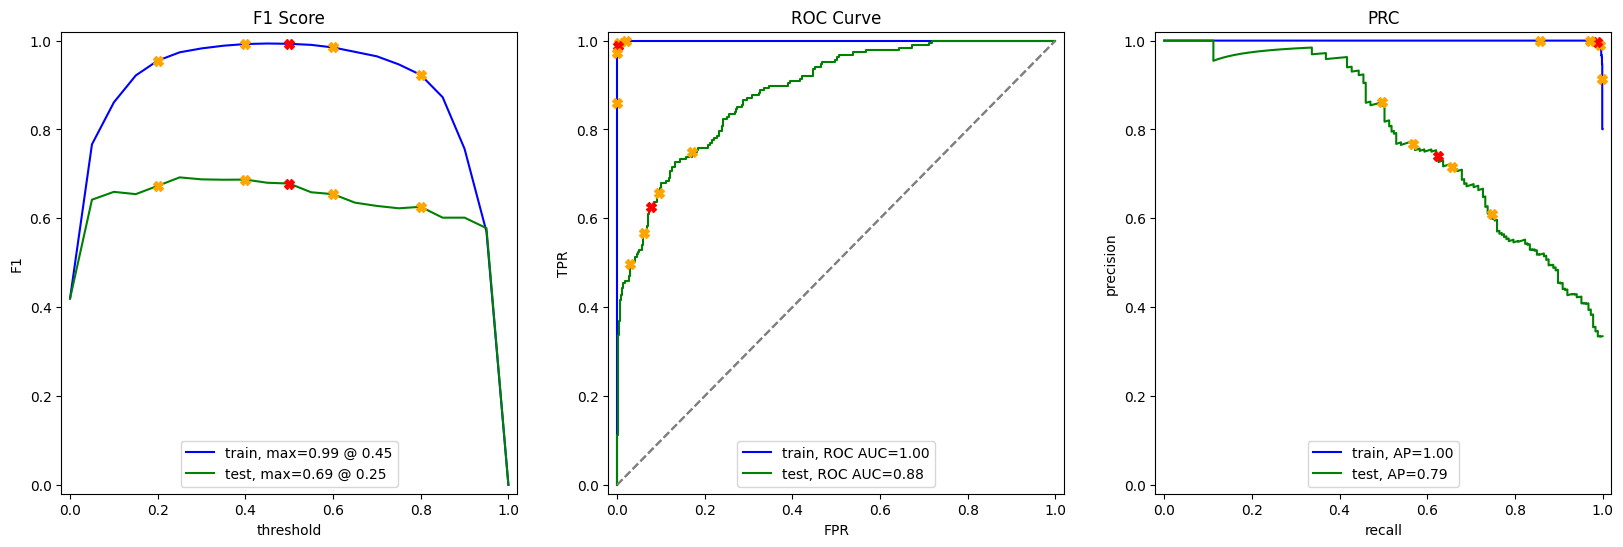

In [ ]:
evaluate_model(best_cb2_model, features_train2, target_train2,  features_test2, target_test2)

In [ ]:
pd.DataFrame(best_cb2_model.feature_importances_, index=features_train2.columns.tolist()).sort_values(0, ascending=False)

,0
num_pmt,19.082670
year,13.910917
MonthlyCharges,13.840110
TotalCharges,13.533058
Type,5.800855
PaymentMethod,5.284299
num_services,3.610204
gender_Male,2.647152
MultipleLines_Yes,2.245103
PaperlessBilling_Yes,2.229496


In [ ]:
# model_results_df = pd.DataFrame({'model': ['LogisticRegression',
#                                            'LogisticRegression2',
#                                            'RandomForestClassifier',
#                                            'RandomForestClassifier2',
#                                            'CatBoostClassifier',
#                                            'CatBoostClassifier2'],
#                               'best_auc': [best_lr_auc, best_lr2_auc, best_rf_auc, best_rf2_auc, best_cb_auc, best_cb2_auc],
#                               'train_time': [best_lr_time, best_lr2_time, best_rf_time, best_rf2_time, best_cb_time, best_cb2_time]})

In [ ]:
model_results_df = pd.DataFrame({'model': [
                                           'LogisticRegression2',
                                           'RandomForestClassifier2',
                                           'CatBoostClassifier2'],
              'best_auc': [best_lr2_auc, best_rf2_auc, best_cb2_auc],
              'train_time': [best_lr2_time, best_rf2_time, best_cb2_time]})

In [ ]:
model_results_df

,model,best_auc,train_time
0,LogisticRegression2,0.904931,9.74
1,RandomForestClassifier2,0.883458,196.99
2,CatBoostClassifier2,0.884934,34.06


4 models were built: a) Dummymodel, b) 2 LogisticRegression models with and without target leakage, c) RandomForestClassifier with and without leakage, and d) CatBoostClassifier with and without leakage

5-fold cross validation was used along with GridSearch to search for the best hyperparameters for each of the models. For LogisticRegression the best C was found. In the case of RandomForestClassifier, they were: n_estimators and max_depth, and for CatBoostClassifier it was iterations.

The evaluation metric is ROC AUC, and based on this, the LogisticRegression model performed the best; it had botht he highest AUC and the least time taken to train the model, including for inference.

In [ ]:
w0 = best_lr2_model.intercept_[0]
w = best_lr2_model.coef_[0]

In [ ]:
lr_feat_importance = pd.DataFrame({'feature': features_train2.columns, 'importance': np.exp(w)}).sort_values('importance', ascending=False)

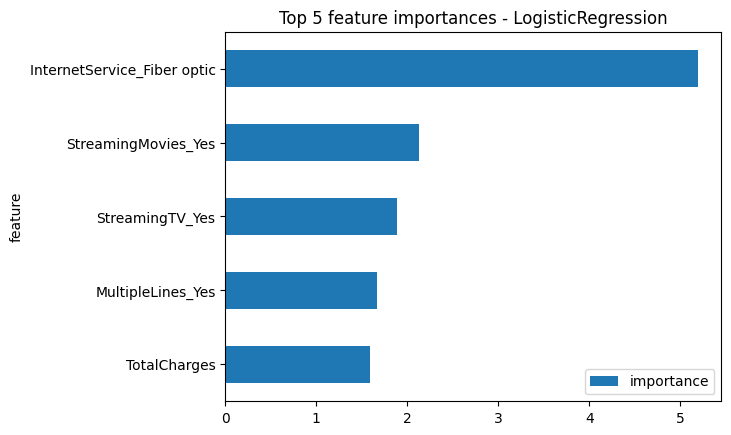

In [ ]:
lr_feat_importance[:5].plot(kind='barh', x='feature', y='importance')
plt.title('Top 5 feature importances - LogisticRegression')
plt.gca().invert_yaxis()

After removing the leakage, the top 5 features are related to phone and internet data with TotalCharges being the odd one.

In [ ]:
rf_feat_importance = pd.DataFrame(best_rf2_model.feature_importances_, index=features_train2.columns.tolist()).sort_values(0, ascending=False).rename(columns={0: 'importance'})

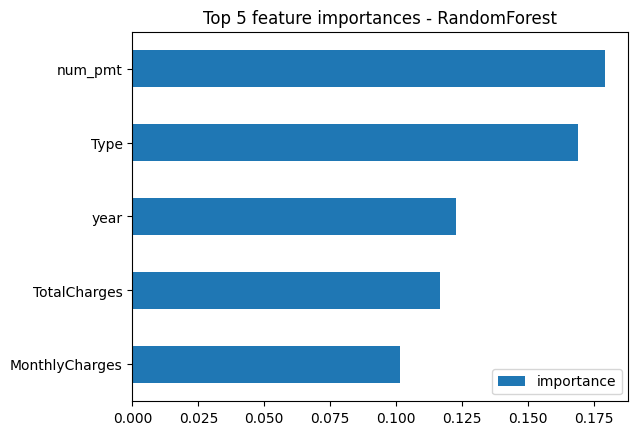

In [ ]:
rf_feat_importance[:5].plot(kind='barh', y='importance')
plt.title('Top 5 feature importances - RandomForest')
plt.gca().invert_yaxis()

Contrast the LogisticRegression models' feature importance with that of RandomForest, and a completely different picture emerges. Here the Type, InternetService, num_pmt, TotalCharges and year features are important. num_pmt is a derived feature.

In [ ]:
cat_feat_importance = pd.DataFrame(best_cb2_model.feature_importances_, index=features_train2.columns.tolist()).sort_values(0, ascending=False).rename(columns={0: 'importance'})

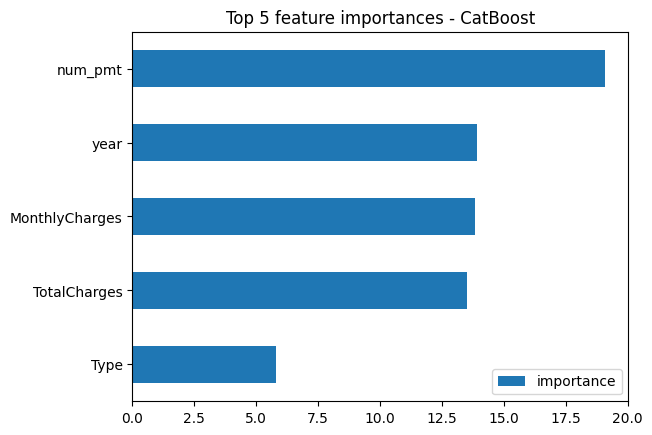

In [ ]:
cat_feat_importance[:5].plot(kind='barh', y='importance')
plt.title('Top 5 feature importances - CatBoost')
plt.gca().invert_yaxis()

The CatBoost model has overfitted itself to the training. Some of the top features are similar to RandomForest.

The tree based models clear differ from linear models in the way they identify important features. However, some derived features such as num_days and num_pmt would be tricky to compute for a new customer, and therefore, based on the insights the models has thrown, it makes sense to stick with LogisticRegression model.

<div class="alert alert-danger">
<b>Reviewer's comment</b>

You did a brilliant job! It looks really awesome. Well done! But there is one problem. Did you notice that resuls for train much better than for train2? But the difference is only in one column 'num_days'. Why this feature is so important? Because it's a target leakage. You have a feature 'year' with is a year of begin date. If we know 'year' and 'num_days' we can predict end date with a high precision. So, you can't use both these features at once. So, please, fix it. You can just remove from your project all the corresponding code.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Yes, I agree. Which why I am using train2 result for the analysis. I had delete/commented all result for train
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Thank you! Everything is correct now:)
    
Good luck with your new job search!
    
</div>

# Summary

Custom Features Engineered:

- num_days: Difference between EndDate and BeginDate.
- num_pmt: Ratio of TotalCharges to MonthlyCharges.
- num_services: Total count of phone or internet services subscribed to by a customer.

Data Preparation:

- A stratified 90:10 split was performed for train and test sets.
- Resolved data leakage by dropping month and dayofweek features.
- Missing values in phone and internet features were replaced with 'No' for customers not availing these services.

Feature Engineer:

- Numerical features (MonthlyCharges, num_days, num_pmt, num_services, TotalCharges) were scaled.
- Categorical and binary features were encoded using one-hot encoding.

Feature Selection:

- Dropped redundant features such as CustomerId, BeginDate, and EndDate.
- Removed leaky features like num_days, month and dayofweek

Modeling and Evaluation:

- 5-fold cross-validation with GridSearch was used to tune hyperparameters for models: C for Logistic Regression, n_estimators and max_depth for RandomForest, and iterations for CatBoost.
- Logistic Regression emerged as the best model with an AUC of 90% on the test set and a training time of 1.5 s with gpu 9.74 s with cpu.

Business Application:

- The model can be used by the marketing team to identify churn.
- Further improvement can be achieved by adding features related to plan usage, customer location, complaints, and resolution time.

# Solution Report
- What steps of the plan were performed and what steps were skipped (explain why)?
- What difficulties did you encounter and how did you manage to solve them?
- What were some of the key steps to solving the task?
- What is your final model and what quality score does it have?

## The following steps were performed:

Exploratory analysis around gender, class of citizen and characteristics of the customers have revealed some useful insights into the behaviour of churned customers.
- The mean monthly spend for a churned customer is higher by $13 compared with an active customer.

- 1037(47%) of the customers who sign up do so within the first year of them churning.

-  Other behaviour noted among the churned customers are: a) customers with no dependents or partners tend to easily churn. b) Monthly billing gives them an easy exit option. c) Paperless billing and Fiber optic internet plan have been a thorn in retaining such customers.

The missing values in TotalCharges were imputed using SimpleImputer. Initially, I thought I would infer these values based on the MonthlyCharges, but I noticed that the monthly charges differ despite having the same usage duration and set of services. The resulting imputation didn't shift the median noticeably. I have also imputed the "missing" values for MultipleLines and various Internet services as I was under the assumption that they were missing at random. But, I was advised that this wasn't the case, so after merging the datasets, I filled them with a response of "No".
- I skipped the idea of imputing missing values using LogisticRegression as this would have been overkill for this problem.

In the feature engineering step, I created num_day which is derived by taking the difference between EndDate and BeginDate. Additionally, I created num_pmt which is a ratio of TotalCharges/MonthlyCharges. num_services, which adds up the various services for a customer depending on whether they've answered "Yes" or "No". Date features such as year, month and dayofweek were extracted from BeginDate.

To avoid data leakage, I stratfied and split the dataset into train and test into a ratio of 80:20. I create a copy of this dataset, as I wanted to test whether num_days caused any leakage; I applied Oridinal Encoding for the TypeandPaymentMethod features.

- I also scaled the numerical features such as num_days, num_pmt, num_services, MonthlyCharges, TotalCharges, including the date features.

- I One-hot encoded the boolean features.

Excluding the Dummy model, I built 6 models using LogisticRegression, RandomForestClassifier and CatBoostClassifier. Each model was trained on the 2 datasets.
- I used 5-fold cross validation during GridSearch to identify useful hyperparameters for the respective models. Only 1 or 2 hyperparameters were tuned to save time.

- With leakage, the LogisticRegression model and CatBoost hit 99% AUC ROC on the test-set. Although the former completed 20x faster.

## Steps skipped

num_days, month and dayofweek didn't have much signal strength relative to num_pmt and year.

Imputation - using LogisticRegression as this would have been overkill.

## Challenges

The difficulties I encountered occurred after I removed the target leaked features such as num_days, num_pmt, year, month and dayofweek all in one go.

- To address this, I added upsampling to the mix and changed the upsampling ratio, however, it only ended up overfitting the RandomForest and CatBoost models, and it helped the LogisticRegression models' AUC score by a little bit.

- I changed the Ordinal features to use One-hot encoding, but that didn't help improve the performance.

- I changed the train/test split to 90:10, and noticed a slight improvement.

- I played with additional hyperparameters in RandomForest and CatBoost such as max_depth/depth, min_sample_leafs/l2_leaf_reg. min_sample_leafs helped reduce overfitting in RandomForest significantly, but l2_leaf_reg didn't help reduce overfitting. And a similar argument in CatBoost threw an error stating that the feature is not supported on CPU.

- After few experiment, I decided to dropped month, dayofweek and num_days. I re-introduced year into the mix along with num_pmt, and this boosted my AUC score to 91% using LogisticRegression; The RandomForestClassifier's performance also improved with slight overfitting. However, CatBoost was severly overfitting although the AUC had improved on the test set.

- What finally worked where the following: increase the train-test split to 90:10, remove num_days, month, and dayofweek, and retain num_pmt and year with the other one-hot encoded features. Upsampling didn't help to improve the performance beyond this point.

## Key steps taken

EDA - to learn about the data distribution and their behaviour.

Feature engineering - Finding a golden feature which improves the signal to noise ratio helped me a lot.

Playing with train-test split also helped.

Avoiding leakage by splitting the data into train/test before scaling and applying ordinal enconding also helped.

Hyperparameter tuning along with 5-fold cross validation made me comfortable knowing that the model would generalize better to new data.

## Final model

Because of the choice of features, I was able to build a simple model using LogisticRegression which achieved an AUC ROC score of 90% on the test set. This model took about 9 seconds to train, and didn't overfit either.